# 0. Prepare data

In [1]:
import math
import numpy as np
import pandas as pd
from rdkit import Chem
import sys
sys.path.append('Mol2DSimi')
from Similarity import similarity_calculate
from enrichment_factor import Enrichment_Factor
from SimiValid import  similarity_validation

In [69]:
!pip install git+https://github.com/reymond-group/map4@v1.0
!pip install tmap

^C
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Active/decoy data
data = pd.read_excel("Data/Apelin_search_standard.xlsx",)
data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002734DB...
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002734DA...


In [3]:
# Query data
base_data = pd.read_csv('Data/similarity.csv')
base_data['CanonSmiles'] = base_data['smiles'].apply(Chem.CanonSmiles)
base_data['Molecule'] = base_data['CanonSmiles'].apply(Chem.MolFromSmiles)
base_data.drop(['smiles'], axis = 1, inplace = True)
base_data.head()

,ID,CanonSmiles,Molecule
0,CMF-019,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002734C9...
1,AMG 986,COc1cccc(OC)c1-n1c(NS(=O)(=O)[C@@H](C)[C@H](C)...,<rdkit.Chem.rdchem.Mol object at 0x000002734C9...
2,BMS-986224,CCOCc1[nH]c(=O)c(-c2nnc(Cc3ccc(Cl)cn3)o2)c(O)c...,<rdkit.Chem.rdchem.Mol object at 0x000002734C9...


# 1. Similarity Calculation

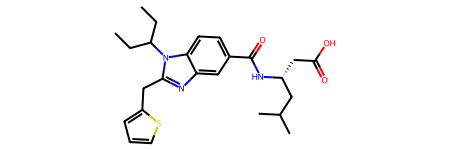

In [4]:
query = []
for _, idx, mol in base_data[["ID", "Molecule"]].itertuples():
    mol.SetProp("_Name", idx)
    query.append(mol)
query[0]

In [ ]:
for i in query:
    simi = similarity_calculate(data = data, query= i, smile_col="CanonSmiles", active_col='Active')
    simi.fit()
    simi.plot()

# 2. Enrichment plot

In [5]:
tani_col = ['tanimoto_avalon','tanimoto_maccs','tanimoto_ecfp2','tanimoto_ecfp4','tanimoto_ecfp6','tanimoto_map4',
 'tanimoto_fcfp2','tanimoto_fcfp4','tanimoto_fcfp6','tanimoto_rdk5','tanimoto_rdk6', 'tanimoto_rdk7',]

In [7]:
query[2].GetProp("_Name")

'BMS-986224'

C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data\AMG 986.csv
tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 27.1%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 27.0%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 28.6%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 34.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 34.8%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 11.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 36.0%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 35.2%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 33.0%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


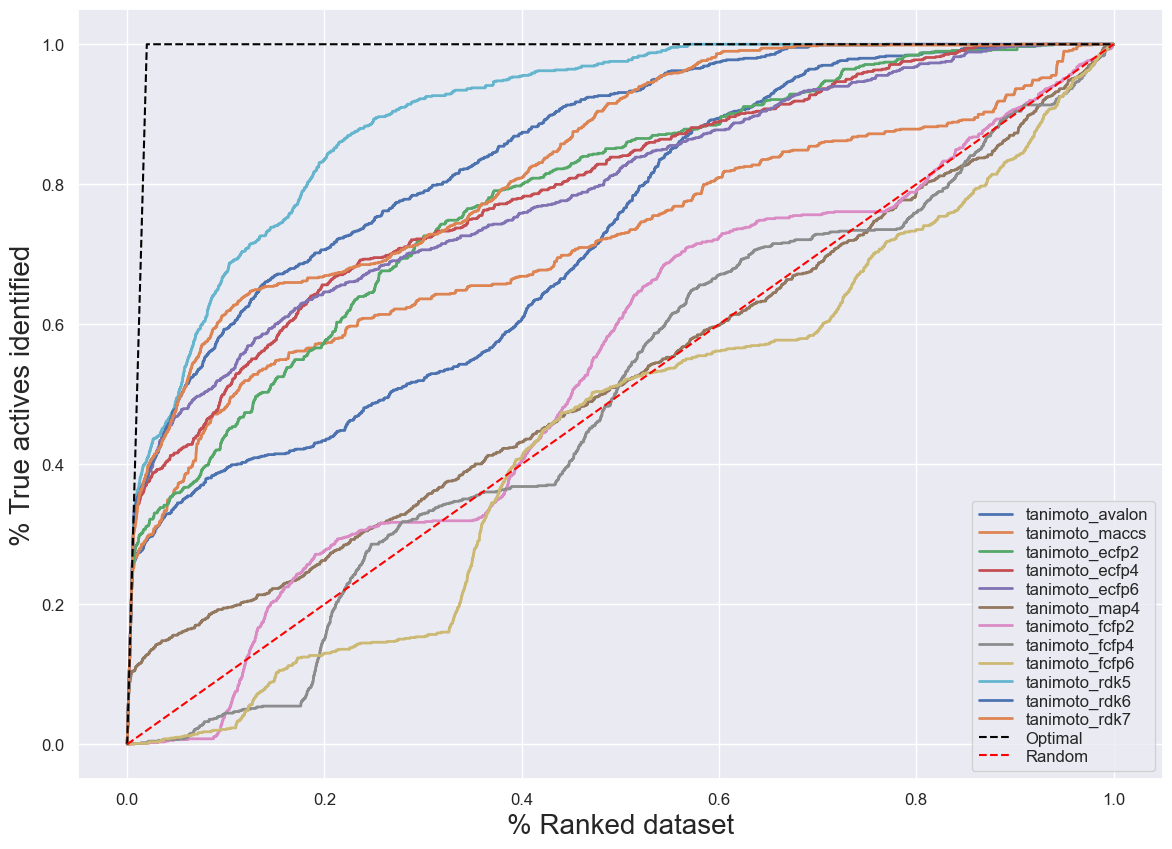

C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data\BMS-986224.csv
tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.3%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 14.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 20.8%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 24.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 1.2%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 1.0%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 0.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 7.3%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 8.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 6.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


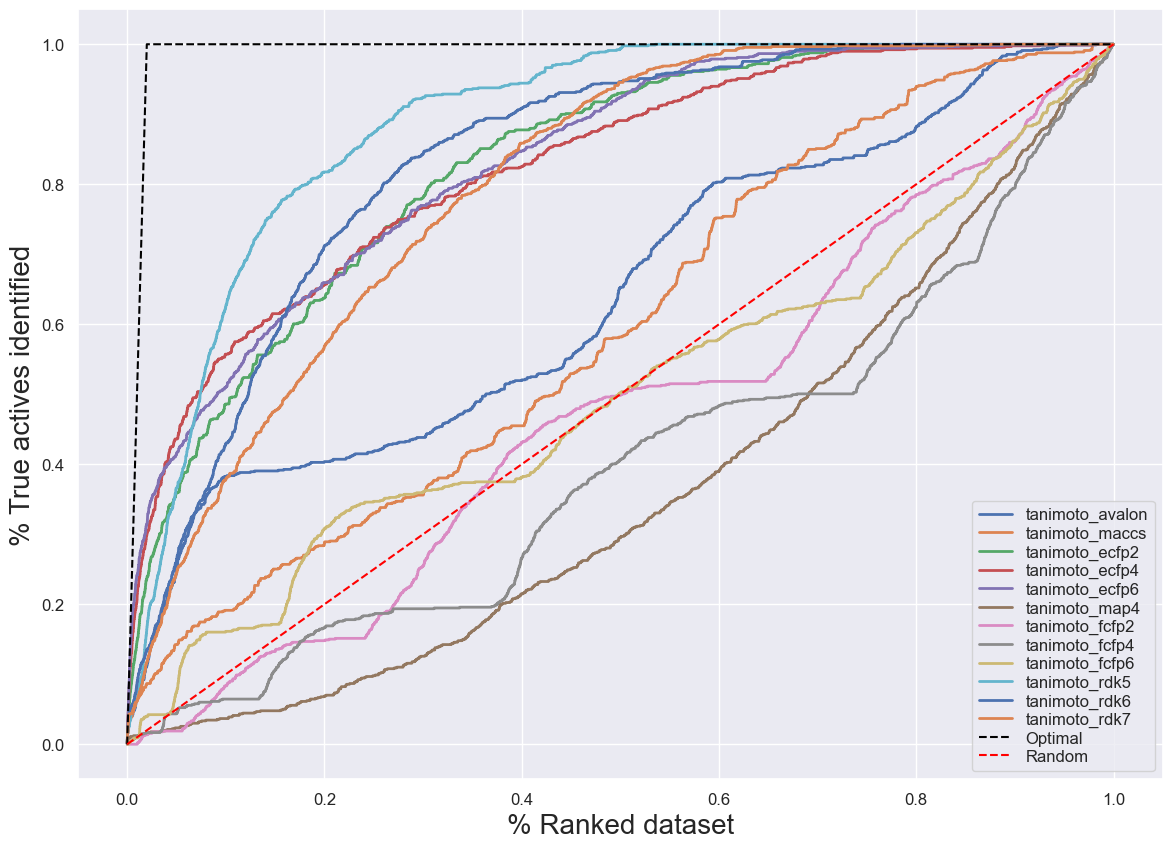

C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data\CMF-019.csv
tanimoto_avalon


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_maccs


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp2


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_ecfp6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_map4


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_fcfp2


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp4


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_fcfp6


,% ranked dataset,% true actives identified
0,0.000022,0.0
1,0.000044,0.0
2,0.000066,0.0
3,0.000088,0.0
4,0.000111,0.0


tanimoto_rdk5


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk6


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


tanimoto_rdk7


,% ranked dataset,% true actives identified
0,0.000022,0.001112
1,0.000044,0.002225
2,0.000066,0.003337
3,0.000088,0.004449
4,0.000111,0.005562


Experimental EF for 1% of ranked dataset (tanimoto_avalon): 4.4%
Experimental EF for 1% of ranked dataset (tanimoto_maccs): 6.2%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp2): 18.7%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp4): 22.1%
Experimental EF for 1% of ranked dataset (tanimoto_ecfp6): 23.1%
Experimental EF for 1% of ranked dataset (tanimoto_map4): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp2): 0.3%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp4): 0.6%
Experimental EF for 1% of ranked dataset (tanimoto_fcfp6): 1.1%
Experimental EF for 1% of ranked dataset (tanimoto_rdk5): 6.8%
Experimental EF for 1% of ranked dataset (tanimoto_rdk6): 3.9%
Experimental EF for 1% of ranked dataset (tanimoto_rdk7): 4.1%
Random EF for 1% of ranked dataset: 1.0%
Optimal EF for 1% of ranked dataset: 50.3%


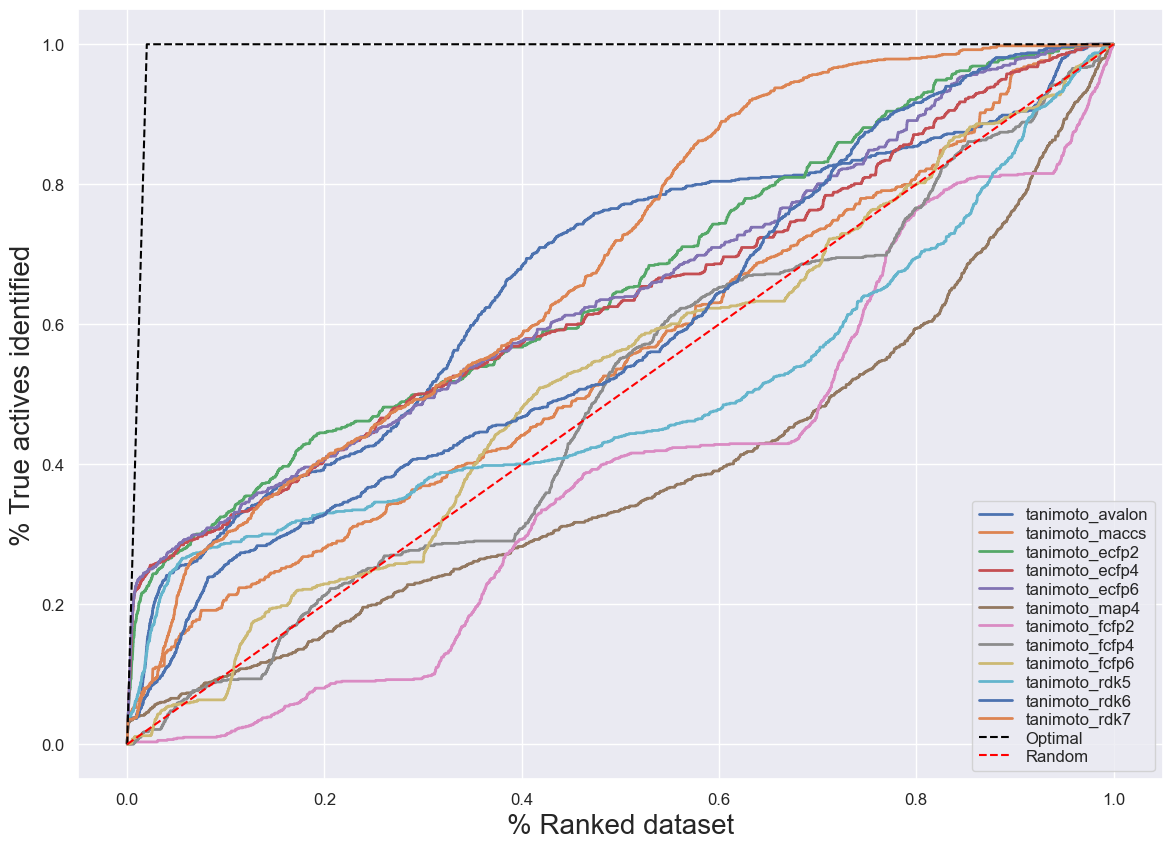

In [8]:
import glob
pBio_cutoff = .5
path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in glob.glob(f"{path}/*.csv"):
    print(i)
    data = pd.read_csv(i)
    data['Active']=data['Active'].astype('float')
    ef = Enrichment_Factor(data = data,similarity_measure= tani_col, pBio_cutoff=pBio_cutoff, 
                       active_col = 'Active', ranked_dataset_percentage_cutoff = 1
                      )
    ef.EF()
    ef.EF_calculate()
    ef.plot_EF()

# 3. Validation

<Figure size 1400x1000 with 0 Axes>

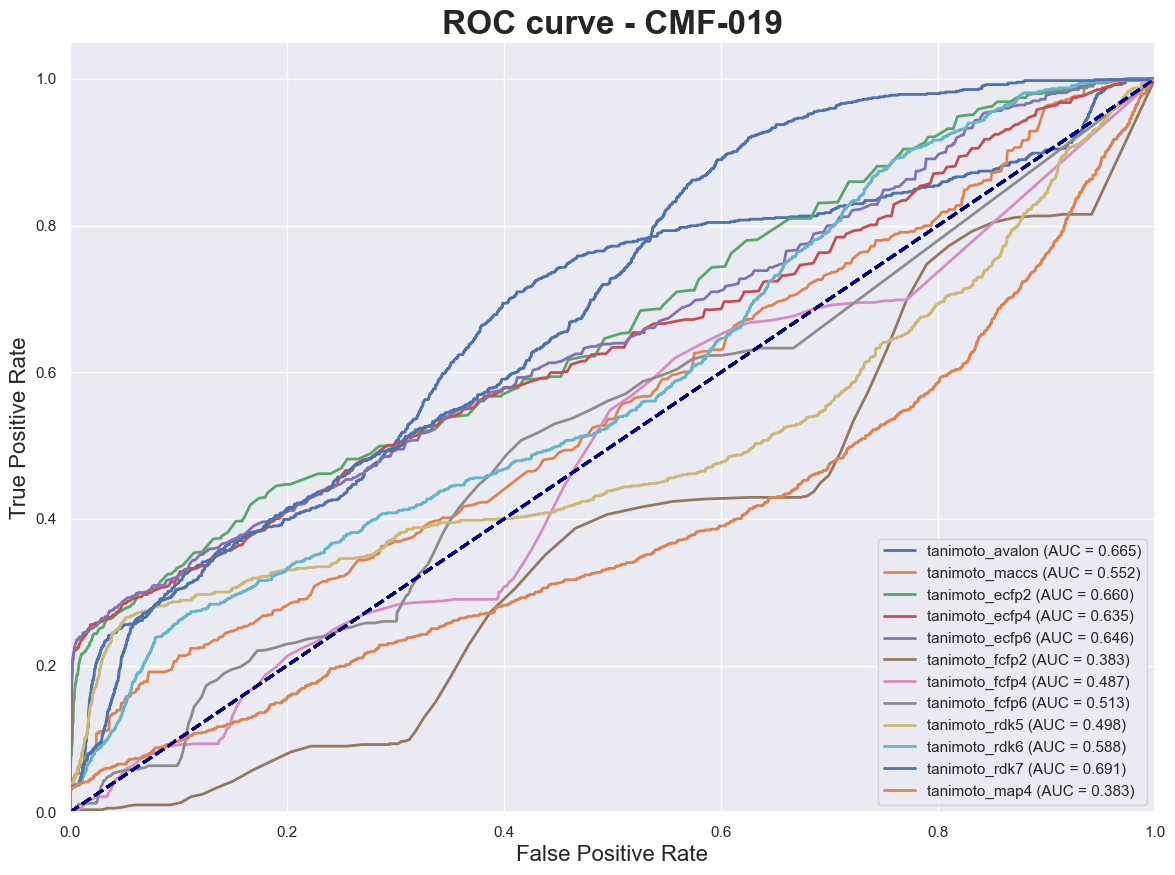

<Figure size 1400x1000 with 0 Axes>

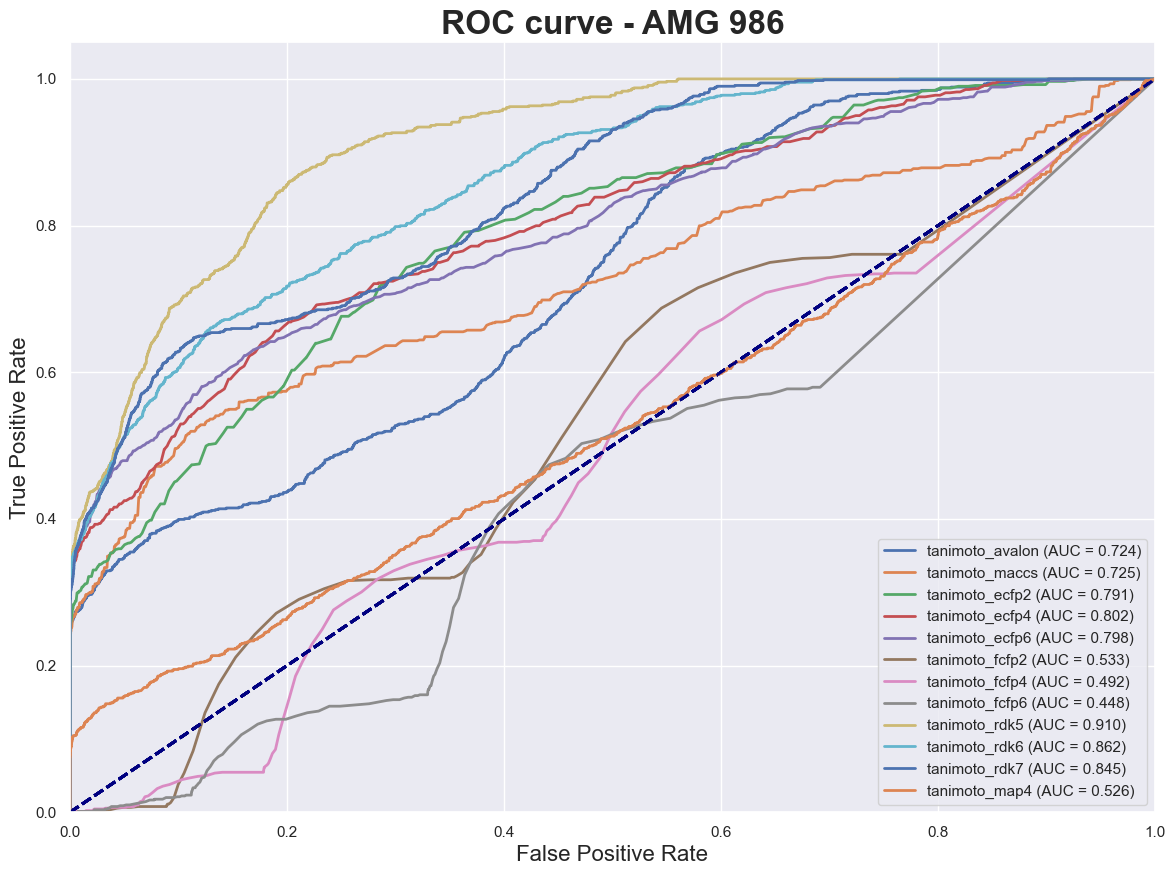

<Figure size 1400x1000 with 0 Axes>

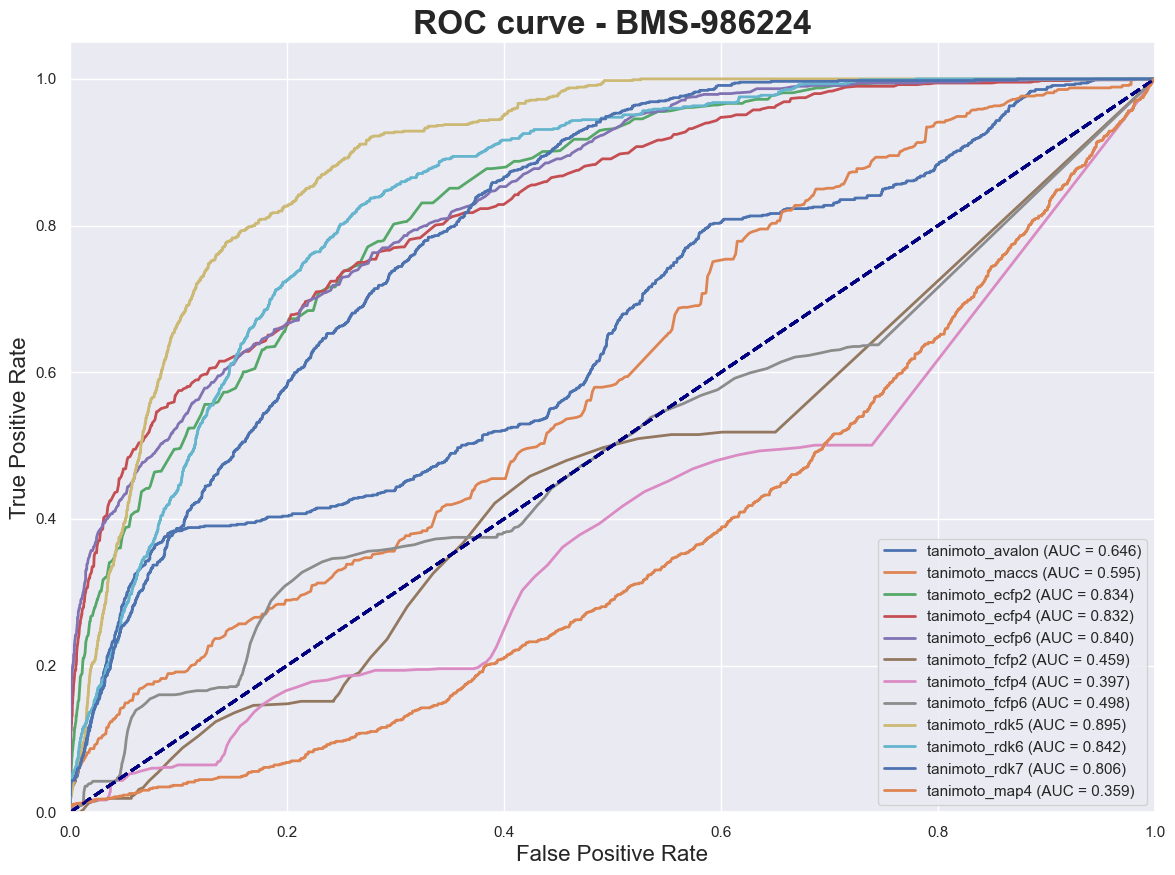

In [7]:
path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in query:
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    valid = similarity_validation(data, active_col = 'Active', scores = 'tanimoto',plot_type = 'roc', figsize = (14,10), query =i )
    #valid.validation()
    valid.visualize()

# 4. Cross-validation

## 4.1. Compare 12 fingerprint for 3 data sets

In [70]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve,average_precision_score,roc_auc_score
from sklearn.metrics import accuracy_score, make_scorer

from significantplot import sign_array, sign_table, sign_plot
import seaborn as sns
import matplotlib.pyplot as plt
def GH_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    GH = (0.75*precision + 0.25*recall)*specificity
    return GH

GH_scoring = make_scorer(GH_score, greater_is_better=True)

def external(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = round(auc(fpr, tpr),3)
    gh = GH_score(y_true, y_pred)
    return f1, roc_auc , gh

col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [71]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'

cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)

QUERY = []
list_AUC = []
list_F1 = []
list_GH = []

list_ext_AUC = []
list_ext_F1 = []
list_ext_GH = []
for i in query:
    QUERY.append(i)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
   
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify = data.Active)
    
    #print("*******Internal******")
    for train_index, test_index in cv.split(data_train.drop(['Active'], axis =1), data_train['Active']):
        list_auc = []
        list_f1 = []
        list_gh = []
        model = []
        test = data_train.iloc[test_index,:]
        for i in col[1:]:
            model.append(i)
            fpr, tpr, _ = roc_curve(test['Active'], test[i])
            roc_auc = round(auc(fpr, tpr),3)
            list_auc.append(roc_auc)
            f1 = f1_score(test['Active'].values, test[i].round())
            list_f1.append(f1)
            gh = GH_score(test['Active'].values, test[i].round())
            list_gh.append(gh)

        list_AUC.append(list_auc)
        list_F1.append(list_f1)
        list_GH.append(list_gh)

    #print("*******External******")
    list_ext_auc = []
    list_ext_f1 = []
    list_ext_gh = []
    for i in col[1:]:
        ext_f1, ext_auc, ext_gh = external(data_test.Active, data_test[i].round())
        list_ext_f1.append(ext_f1)
        list_ext_auc.append(ext_auc)
        list_ext_gh.append(ext_gh)
    list_ext_F1.append(list_ext_f1)
    list_ext_AUC.append(list_ext_auc)
    list_ext_GH.append(list_ext_gh)
        

### External
Output External results

In [76]:
ext_AUC = pd.DataFrame(list_ext_AUC, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
ext_F1 = pd.DataFrame(list_ext_F1, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
ext_GH = pd.DataFrame(list_ext_GH, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
print('*****AUC*****')
display(ext_AUC)
print('****GH*****')
display(ext_GH)
print('*****F1*****')
display(ext_F1)

*****AUC*****


,CMF-019,AMG-986,BMS-986224
tanimoto_avalon,0.524,0.617,0.516
tanimoto_maccs,0.529,0.656,0.522
tanimoto_ecfp2,0.528,0.589,0.506
tanimoto_ecfp4,0.522,0.553,0.503
tanimoto_ecfp6,0.517,0.528,0.503
tanimoto_fcfp2,0.500,0.500,0.500
tanimoto_fcfp4,0.500,0.500,0.500
tanimoto_fcfp6,0.500,0.500,0.500
tanimoto_rdk5,0.528,0.586,0.506
tanimoto_rdk6,0.528,0.586,0.506


****GH*****


,CMF-019,AMG-986,BMS-986224
tanimoto_avalon,0.113054,0.415839,0.289257
tanimoto_maccs,0.078667,0.128534,0.075724
tanimoto_ecfp2,0.763889,0.794444,0.752778
tanimoto_ecfp4,0.761111,0.776389,0.751389
tanimoto_ecfp6,0.758333,0.763889,0.751389
tanimoto_fcfp2,0.000000,0.000000,0.000000
tanimoto_fcfp4,0.000000,0.000000,0.000000
tanimoto_fcfp6,0.000000,0.000000,0.000000
tanimoto_rdk5,0.763889,0.793056,0.752778
tanimoto_rdk6,0.763889,0.793056,0.752778


*****F1*****


,CMF-019,AMG-986,BMS-986224
tanimoto_avalon,0.078431,0.318519,0.061224
tanimoto_maccs,0.043550,0.076538,0.041537
tanimoto_ecfp2,0.105263,0.301887,0.021978
tanimoto_ecfp4,0.085106,0.190955,0.011050
tanimoto_ecfp6,0.064516,0.105263,0.011050
tanimoto_fcfp2,0.000000,0.000000,0.000000
tanimoto_fcfp4,0.000000,0.000000,0.000000
tanimoto_fcfp6,0.000000,0.000000,0.000000
tanimoto_rdk5,0.105263,0.293839,0.021978
tanimoto_rdk6,0.105263,0.293839,0.021978


### Internal Cross-Validation
Output Internal Result

In [17]:
#Internal-cross-validation
AUC = pd.DataFrame(list_AUC, columns = model)
F1 = pd.DataFrame(list_F1, columns = model)
GH = pd.DataFrame(list_GH, columns = model)

In [56]:
#tách riêng 3 tập chất chuẩn
CMF_019_AUC = AUC.iloc[:30,:].reset_index(drop=True)
AMG_986_AUC = AUC.iloc[30:60,:].reset_index(drop=True)
BMS_986224_AUC = AUC.iloc[60:,:].reset_index(drop=True)

CMF_019_GH = GH.iloc[:30,:].reset_index(drop=True)
AMG_986_GH = GH.iloc[30:60,:].reset_index(drop=True)
BMS_986224_GH = GH.iloc[60:,:].reset_index(drop=True)

CMF_019_F1 = F1.iloc[:30,:].reset_index(drop=True)
AMG_986_F1 = F1.iloc[30:60,:].reset_index(drop=True)
BMS_986224_F1 = F1.iloc[60:,:].reset_index(drop=True)

In [78]:
#kết quả
AUC_result = pd.DataFrame()
AUC_result["CMF_019"] = round(CMF_019_AUC.mean(),3).astype(str)+ '±' + round(CMF_019_AUC.std(),3).astype(str)
AUC_result["AMG_986"] = round(AMG_986_AUC.mean(),3).astype(str)+ '±' + round(AMG_986_AUC.std(),3).astype(str)
AUC_result["BMS_986224"] = round(BMS_986224_AUC.mean(),3).astype(str)+ '±' + round(BMS_986224_AUC.std(),3).astype(str)
AUC_result 

,CMF_019,AMG_986,BMS_986224
tanimoto_avalon,0.655±0.03,0.728±0.032,0.648±0.035
tanimoto_maccs,0.549±0.04,0.733±0.042,0.601±0.029
tanimoto_ecfp2,0.651±0.035,0.795±0.028,0.835±0.019
tanimoto_ecfp4,0.625±0.038,0.808±0.03,0.832±0.022
tanimoto_ecfp6,0.639±0.034,0.804±0.029,0.84±0.022
tanimoto_fcfp2,0.39±0.032,0.535±0.036,0.459±0.034
tanimoto_fcfp4,0.484±0.032,0.49±0.027,0.401±0.036
tanimoto_fcfp6,0.512±0.028,0.44±0.031,0.504±0.036
tanimoto_rdk5,0.491±0.051,0.914±0.015,0.897±0.013
tanimoto_rdk6,0.586±0.045,0.868±0.021,0.847±0.016


In [79]:
GH_result = pd.DataFrame()
GH_result["CMF_019"] = round(CMF_019_GH.mean(),3).astype(str)+ '±' + round(CMF_019_GH.std(),3).astype(str)
GH_result["AMG_986"] = round(AMG_986_GH.mean(),3).astype(str)+ '±' + round(AMG_986_GH.std(),3).astype(str)
GH_result["BMS_986224"] = round(BMS_986224_GH.mean(),3).astype(str)+ '±' + round(BMS_986224_GH.std(),3).astype(str)
GH_result 

,CMF_019,AMG_986,BMS_986224
tanimoto_avalon,0.067±0.042,0.446±0.055,0.211±0.13
tanimoto_maccs,0.074±0.012,0.139±0.015,0.082±0.007
tanimoto_ecfp2,0.658±0.262,0.805±0.011,0.428±0.38
tanimoto_ecfp4,0.607±0.309,0.781±0.007,0.377±0.384
tanimoto_ecfp6,0.58±0.325,0.768±0.004,0.302±0.376
tanimoto_fcfp2,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_fcfp4,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_fcfp6,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_rdk5,0.658±0.262,0.803±0.01,0.428±0.38
tanimoto_rdk6,0.584±0.262,0.804±0.01,0.428±0.38


In [80]:
F1_result = pd.DataFrame()
F1_result["CMF_019"] = round(CMF_019_F1.mean(),3).astype(str)+ '±' + round(CMF_019_F1.std(),3).astype(str)
F1_result["AMG_986"] = round(AMG_986_F1.mean(),3).astype(str)+ '±' + round(AMG_986_F1.std(),3).astype(str)
F1_result["BMS_986224"] = round(BMS_986224_F1.mean(),3).astype(str)+ '±' + round(BMS_986224_F1.std(),3).astype(str)
F1_result

,CMF_019,AMG_986,BMS_986224
tanimoto_avalon,0.047±0.028,0.36±0.054,0.054±0.036
tanimoto_maccs,0.041±0.006,0.084±0.008,0.045±0.004
tanimoto_ecfp2,0.059±0.037,0.356±0.059,0.022±0.022
tanimoto_ecfp4,0.051±0.038,0.221±0.044,0.019±0.022
tanimoto_ecfp6,0.038±0.029,0.134±0.03,0.014±0.019
tanimoto_fcfp2,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_fcfp4,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_fcfp6,0.0±0.0,0.0±0.0,0.0±0.0
tanimoto_rdk5,0.059±0.037,0.347±0.056,0.022±0.022
tanimoto_rdk6,0.058±0.037,0.351±0.056,0.022±0.022


### Vẽ biểu đồ posthoc so sánh dấu vân tay tốt nhất trên từng tập chất chuẩn

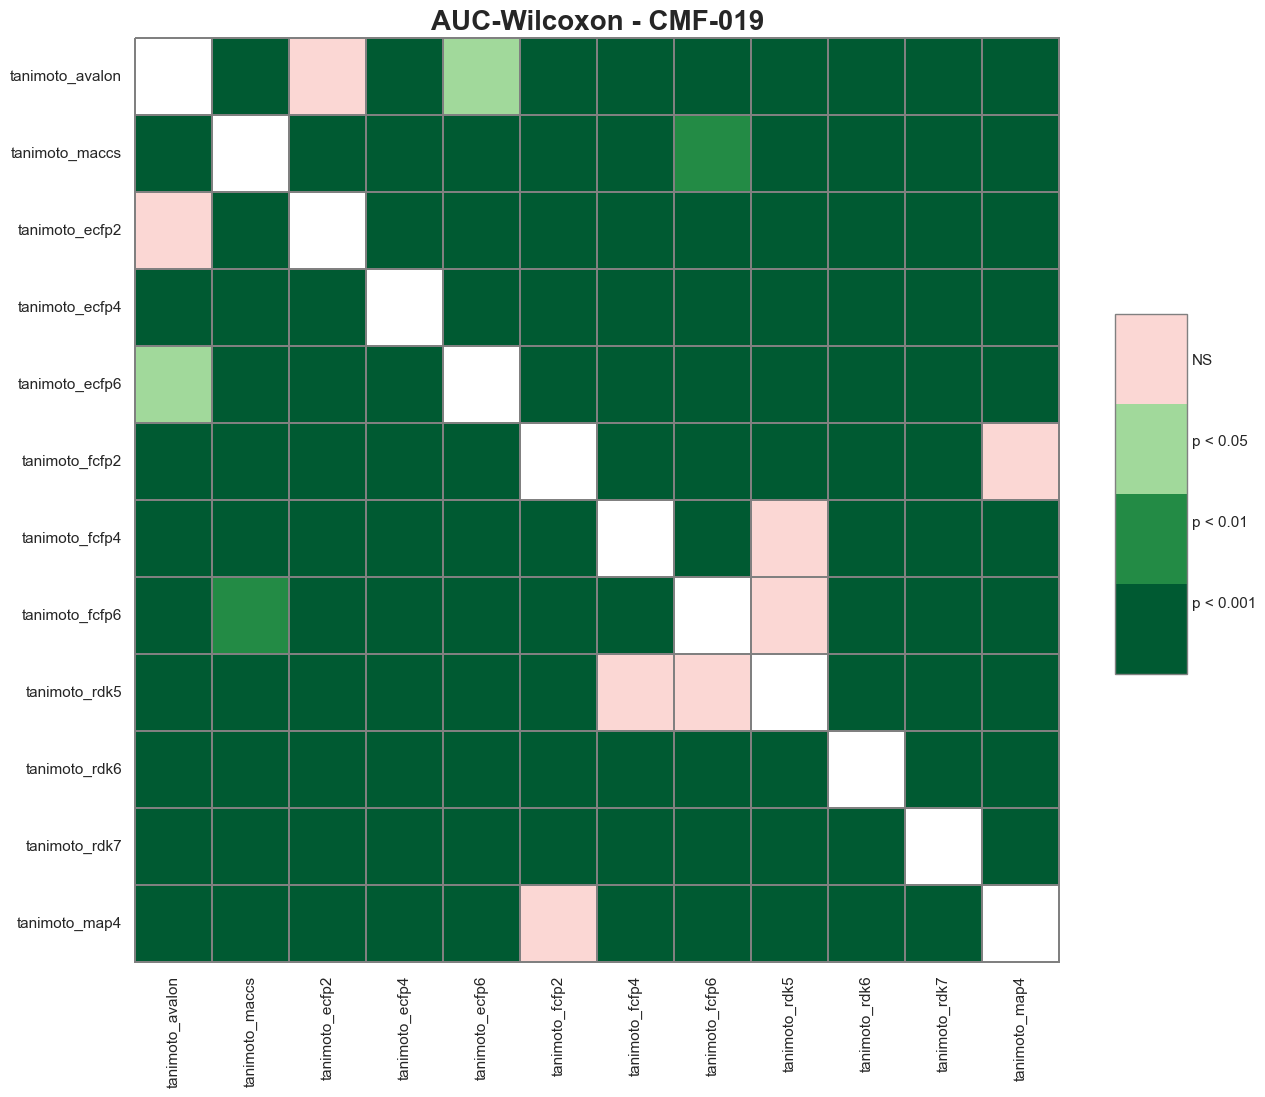

In [81]:
import scikit_posthocs as sp
df_melt = pd.melt(CMF_019_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (18,12))
plt.title("AUC-Wilcoxon - CMF-019", fontsize = 20, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-CMF-019.png", dpi = 600)

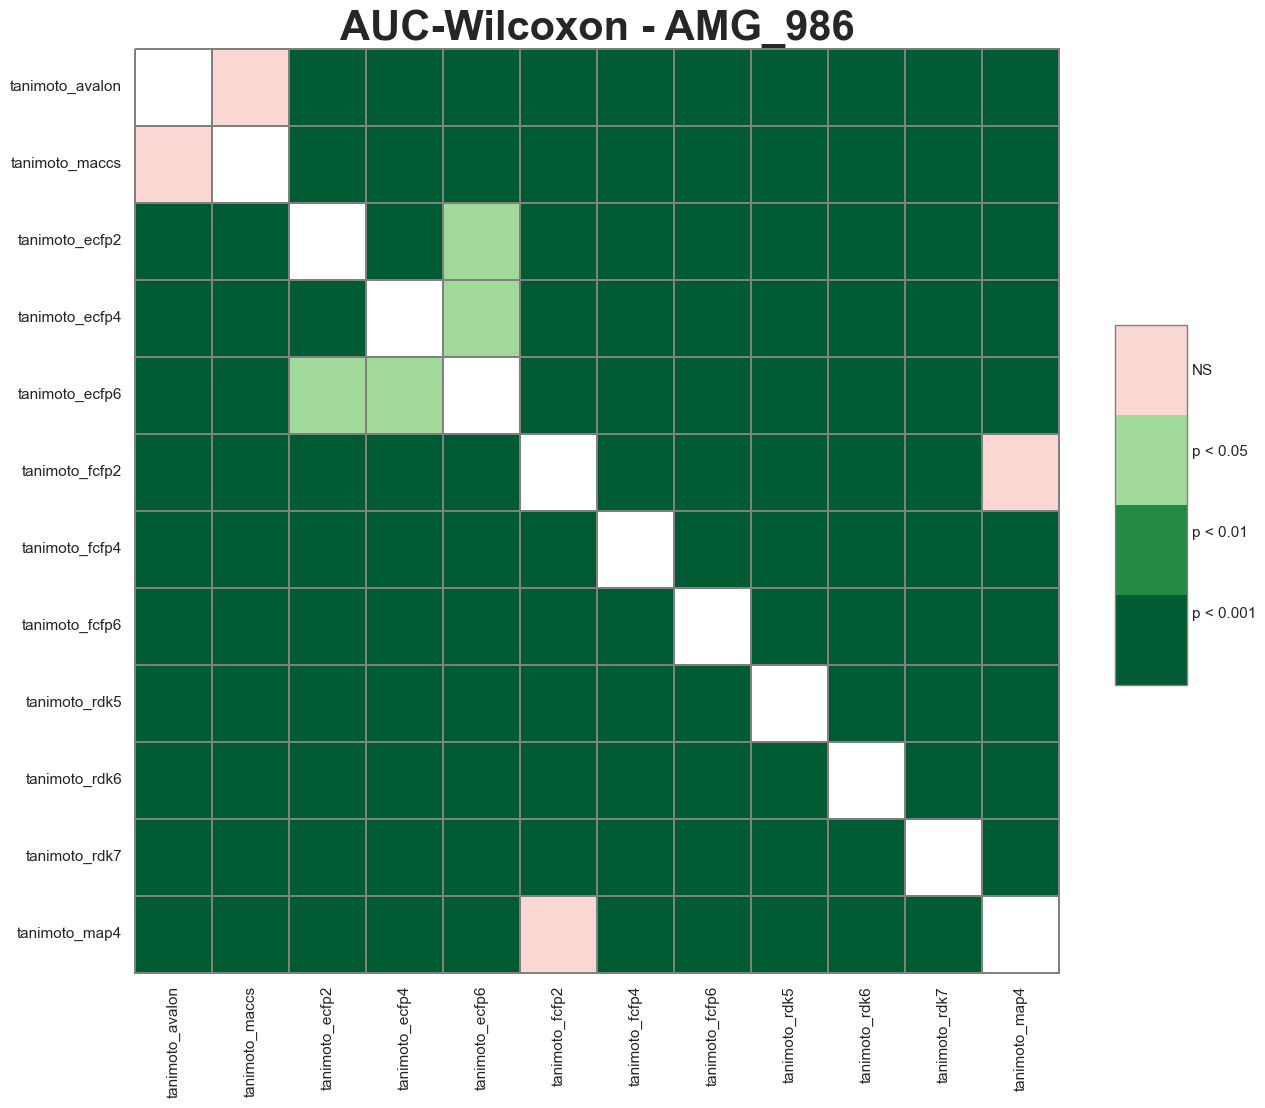

In [82]:
df_melt = pd.melt(AMG_986_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (18,12))
plt.title("AUC-Wilcoxon - AMG_986", fontsize = 30, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-AMG-986.png", dpi = 600)

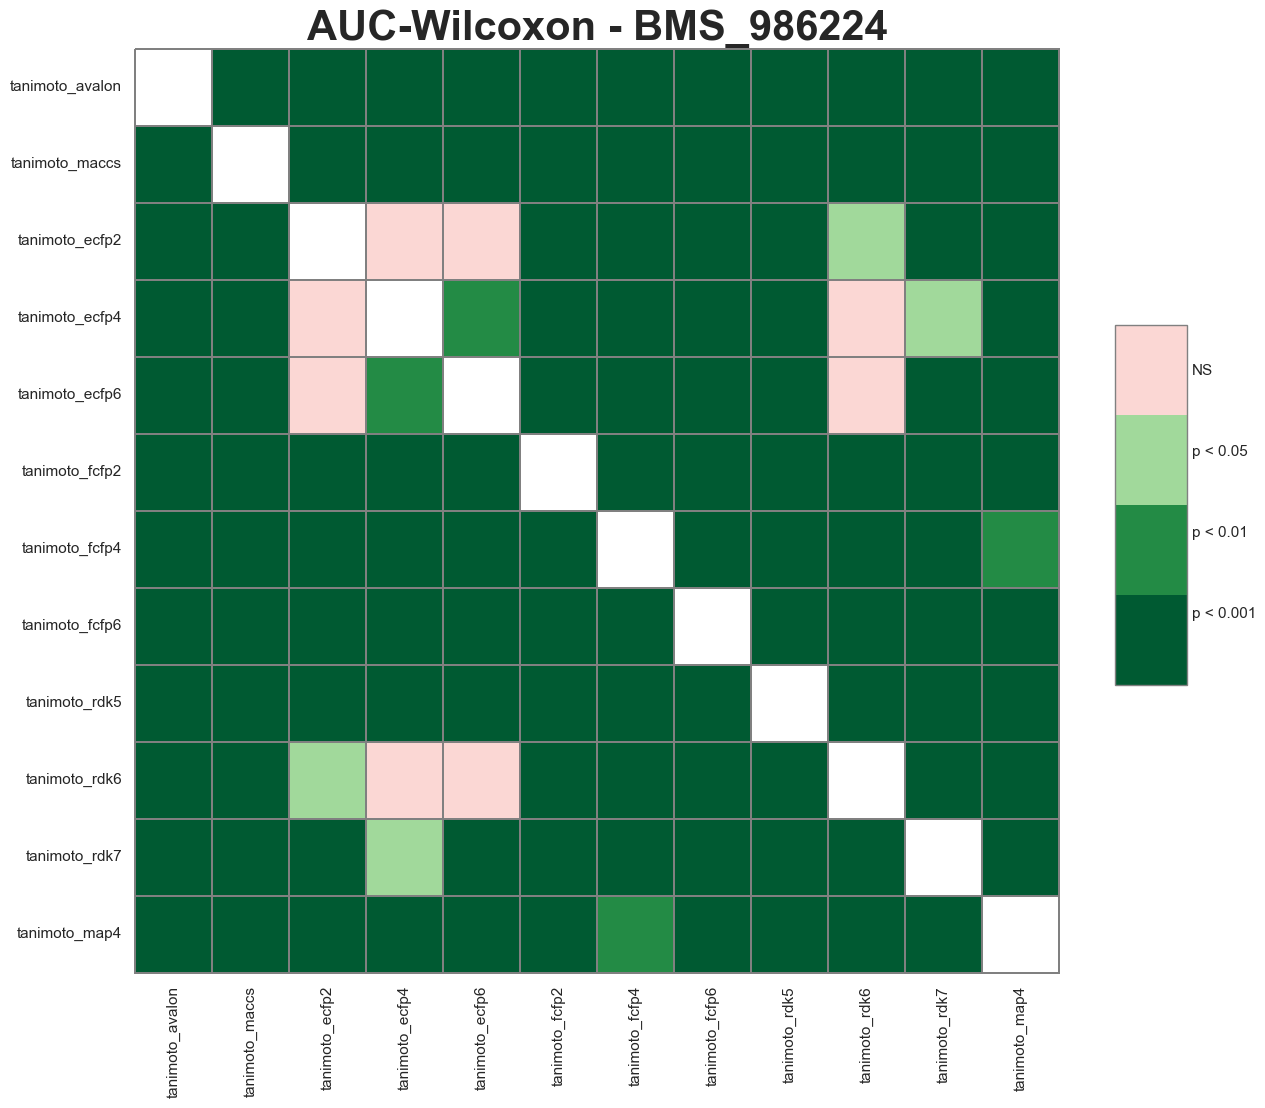

In [83]:
df_melt = pd.melt(BMS_986224_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (18,12))
plt.title("AUC-Wilcoxon - BMS_986224", fontsize = 30, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-BMS_986224.png", dpi = 600)

### So sánh 3 chất chuẩn với dấu vân tay tốt nhất

In [85]:
index = ['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5']
list_compare = []
list_compare.append(CMF_019_AUC['tanimoto_rdk7'])
list_compare.append(AMG_986_AUC['tanimoto_rdk5'])
list_compare.append(BMS_986224_AUC['tanimoto_rdk5'])

In [86]:
df_compare = pd.DataFrame(list_compare, index = index).T

CMF_019_rdk7 vs. AMG_986_rdk5: Custom statistical test, P_val:1.863e-09
AMG_986_rdk5 vs. BMS_986224_rdk5: Custom statistical test, P_val:6.918e-06
CMF_019_rdk7 vs. BMS_986224_rdk5: Custom statistical test, P_val:1.863e-09


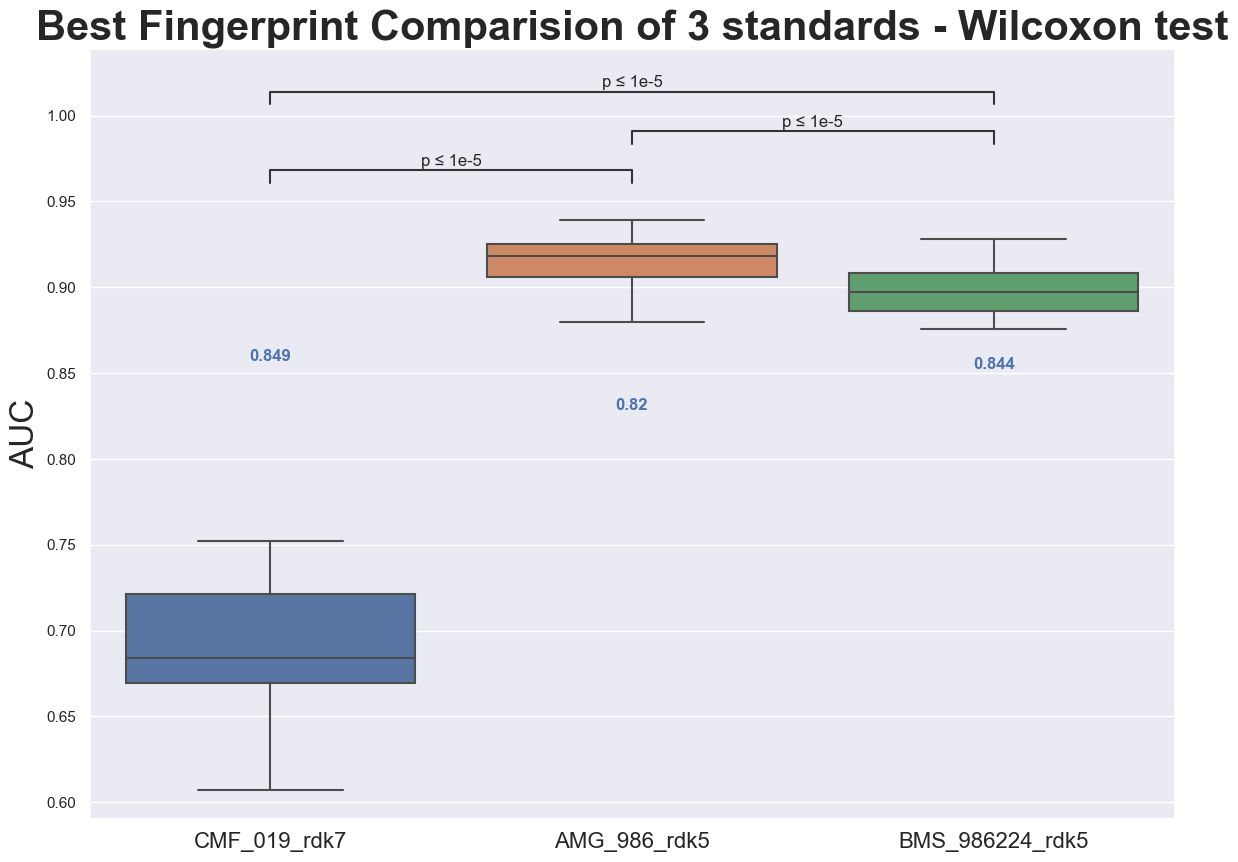

In [89]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare.reset_index(), id_vars=['index'], value_vars=df_compare.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['AMG_986_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['AMG_986_rdk5'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF_019_rdk7', 'AMG_986_rdk5'),
         ('AMG_986_rdk5','BMS_986224_rdk5'),
         ('CMF_019_rdk7','BMS_986224_rdk5'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


mean = list()
result = df_compare.values
for i in range(len(result)):
    x = result[i].mean().round(3)
    mean.append(x)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare.index)


dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='b',weight='semibold', fontsize = 12)
    

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare.columns, fontsize = 16)
ax.set_title("Best Fingerprint Comparision of 3 standards - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/Best Fingerprint Comparision of 3 standards.png", dpi = 600)

## 4.2. Best Fingerprint
chọn lựa dấu vân tay phù hợp nhất trên cả 3 bộ chất chuẩn

In [96]:
AUC = pd.DataFrame(list_AUC, columns = model)

In [97]:
AUC

,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,tanimoto_fcfp2,tanimoto_fcfp4,tanimoto_fcfp6,tanimoto_rdk5,tanimoto_rdk6,tanimoto_rdk7,tanimoto_map4
0,0.691,0.609,0.697,0.689,0.694,0.388,0.513,0.516,0.581,0.661,0.738,0.439
1,0.647,0.598,0.657,0.623,0.630,0.388,0.480,0.539,0.484,0.573,0.676,0.411
2,0.685,0.571,0.663,0.647,0.636,0.360,0.456,0.523,0.523,0.618,0.716,0.372
3,0.682,0.540,0.665,0.636,0.664,0.412,0.533,0.493,0.498,0.573,0.678,0.367
4,0.637,0.552,0.677,0.633,0.664,0.376,0.453,0.530,0.472,0.563,0.668,0.367
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.670,0.601,0.857,0.854,0.862,0.391,0.409,0.533,0.889,0.839,0.813,0.317
86,0.692,0.614,0.880,0.878,0.874,0.466,0.443,0.578,0.898,0.825,0.782,0.334
87,0.583,0.605,0.814,0.814,0.806,0.428,0.361,0.439,0.909,0.859,0.822,0.417
88,0.632,0.617,0.810,0.801,0.824,0.497,0.357,0.497,0.918,0.863,0.832,0.417


In [105]:
result = pd.DataFrame()
result["AUC"] = round(AUC.mean(),3).astype(str)+ '±' + round(AUC.std(),3).astype(str)
result

,AUC
tanimoto_avalon,0.677±0.049
tanimoto_maccs,0.628±0.086
tanimoto_ecfp2,0.76±0.084
tanimoto_ecfp4,0.755±0.098
tanimoto_ecfp6,0.761±0.092
tanimoto_fcfp2,0.462±0.068
tanimoto_fcfp4,0.458±0.051
tanimoto_fcfp6,0.486±0.045
tanimoto_rdk5,0.768±0.199
tanimoto_rdk6,0.767±0.132


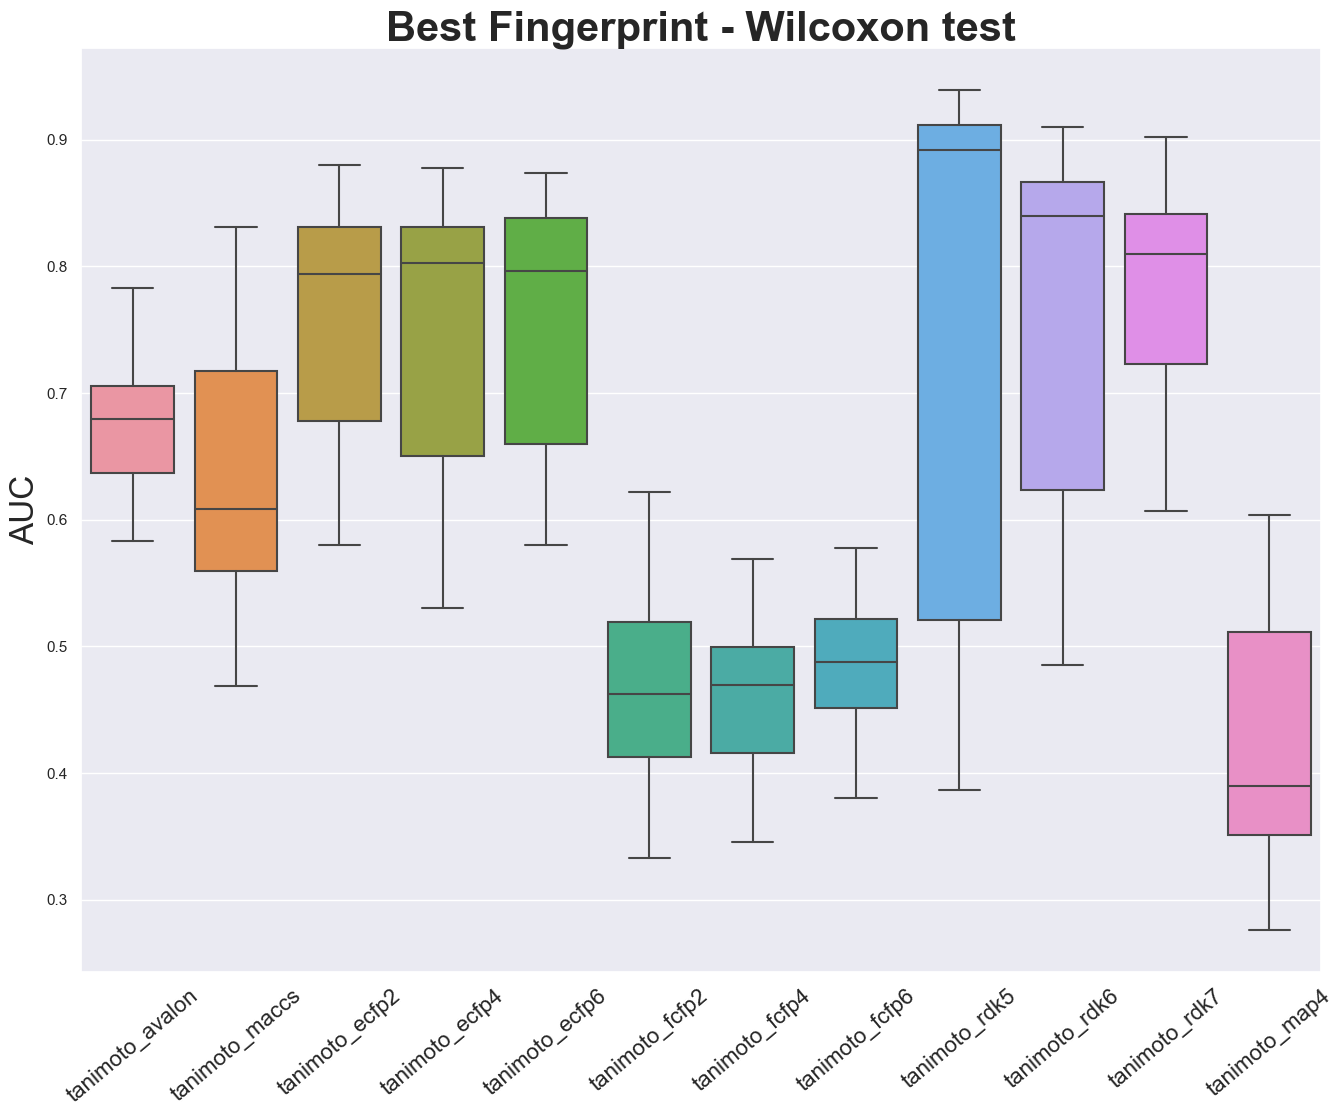

In [57]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

plt.figure(figsize = (16,12))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = AUC.columns,rotation = 40, fontsize = 16)
ax.set_title("Best Fingerprint - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/Best Fingerprint - Wilcoxon test.png", dpi = 600)

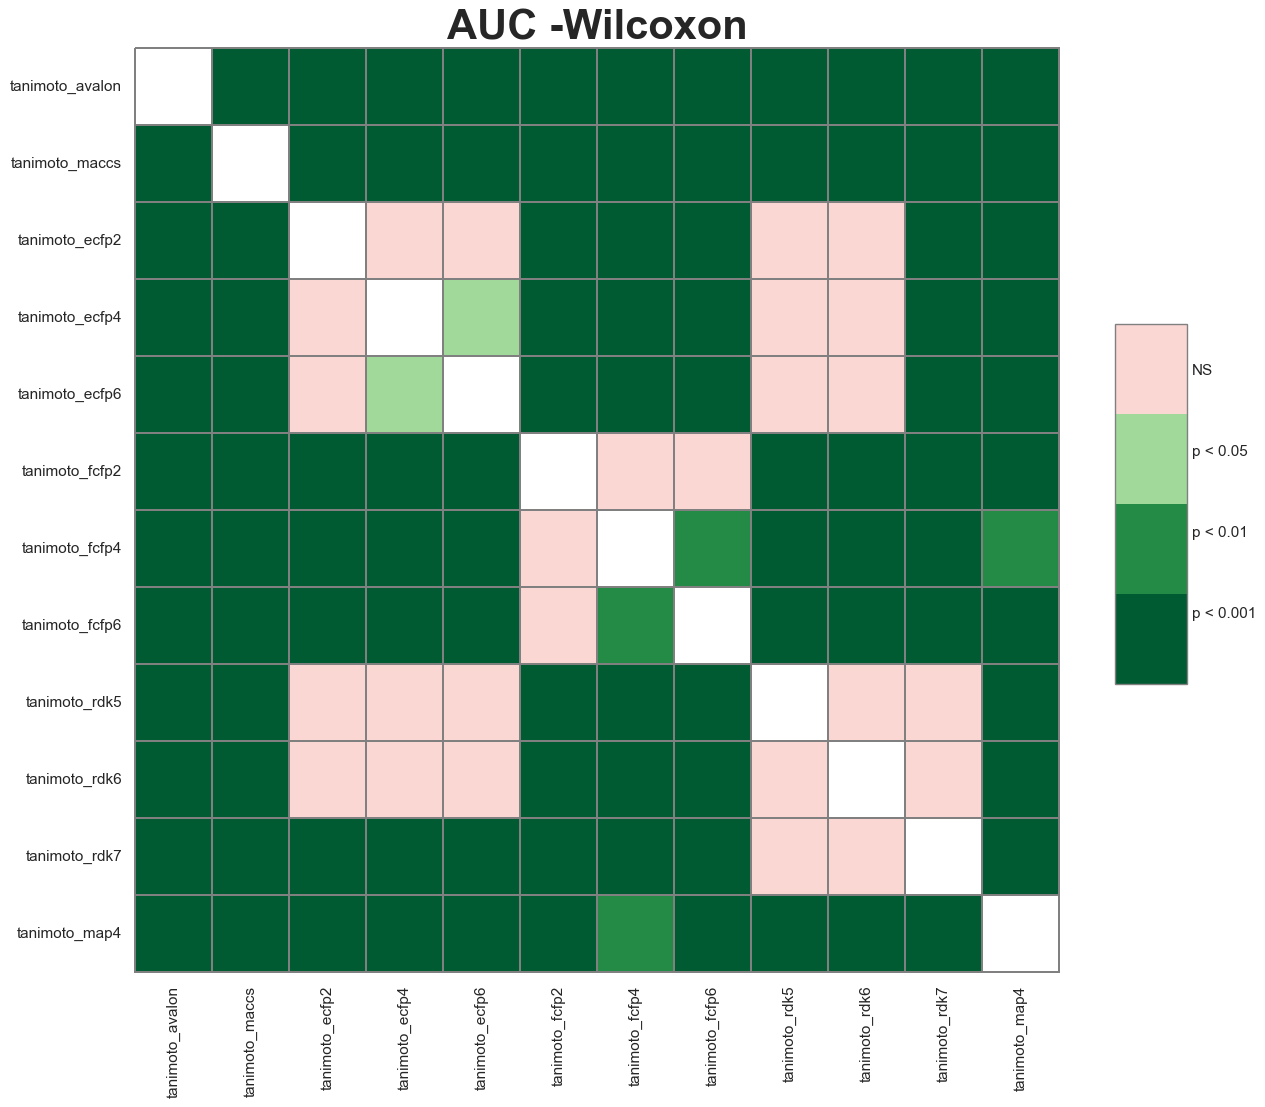

In [31]:
df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (18,12))
plt.title("AUC -Wilcoxon", fontsize = 30, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/Best Fingerprint.png", dpi = 600)

## 4.3. Ensemble

# RDKIT7

In [106]:
#tính dấu vân tay rdkit cho chất chuẩn. 0:không có, 1: có
from rdkit import Chem, DataStructs
ensemble=[]
cp = []
for i in query:
    cp.append(i.GetProp("_Name"))
    fp = Chem.RDKFingerprint(i, maxPath=7, fpSize=4096, nBitsPerHash=2)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    ensemble.append(ar)

df_ensemble  =pd.DataFrame(ensemble, index = cp).T
df_ensemble

,CMF-019,AMG 986,BMS-986224
0,0,0,1
1,1,0,1
2,0,1,1
3,0,1,0
4,0,1,0
...,...,...,...
4091,0,1,1
4092,0,0,0
4093,0,1,1
4094,0,0,0


In [107]:
df_ensemble['CHA'] = df_ensemble.sum(axis=1)

df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>=1] =1

df_ensemble['CHA-2'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-2'][df_ensemble['CHA']>=2] =1

df_ensemble['CHA-3'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-3'][df_ensemble['CHA']>=3] =1

In [108]:
df_ensemble['CHA-1'].sum()

3137.0

In [109]:
df_ensemble['CHA-2'].sum()

1465.0

In [110]:
df_ensemble['CHA-3'].sum()

315.0

In [111]:
df_ensemble

,CMF-019,AMG 986,BMS-986224,CHA,CHA-1,CHA-2,CHA-3
0,0,0,1,1,1.0,0.0,0.0
1,1,0,1,2,1.0,1.0,0.0
2,0,1,1,2,1.0,1.0,0.0
3,0,1,0,1,1.0,0.0,0.0
4,0,1,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...
4091,0,1,1,2,1.0,1.0,0.0
4092,0,0,0,0,0.0,0.0,0.0
4093,0,1,1,2,1.0,1.0,0.0
4094,0,0,0,0,0.0,0.0,0.0


In [112]:
data = pd.read_excel("Data/Apelin_search_standard.xlsx",)
data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...


In [113]:
data_cha = data.copy()
data_cha

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
...,...,...,...,...
45207,DUDE_44946,0,CCc1c(C(=O)N(CCC(=O)NC(=O)C(=C(C)O)C2=C(c3c(F)...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45208,DUDE_44947,0,C=c1[nH]c(Cl)c(C=C2CN(C(=O)C(C)N3C(=O)C(C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45209,DUDE_44948,0,O=C(CCc1cc(Cl)cc2cc3c(c(F)c12)CCC3)Nc1cc(Cl)cc...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45210,DUDE_44949,0,Cc1ccc(NC(=O)NCCN(C(=O)OCC(=O)N(C2CC2)C(CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...


In [114]:
# Chuyển string của 0, 1 thành ExplicitVBitVect để tính Tanimoto
arr_tostring1 = "".join(df_ensemble['CHA-1'].astype(str))
string1 = arr_tostring1.replace(".0", "")
EBitVect_cha1 = DataStructs.cDataStructs.CreateFromBitString(string1)
print(EBitVect_cha1)

arr_tostring2 = "".join(df_ensemble['CHA-2'].astype(str))
string2 = arr_tostring2.replace(".0", "")
EBitVect_cha2 = DataStructs.cDataStructs.CreateFromBitString(string2)
print(EBitVect_cha2)

arr_tostring3 = "".join(df_ensemble['CHA-3'].astype(str))
string3 = arr_tostring3.replace(".0", "")
EBitVect_cha3 = DataStructs.cDataStructs.CreateFromBitString(string3)
print(EBitVect_cha3)

rdk7_list = data['Molecule'].apply(Chem.RDKFingerprint, maxPath=7, fpSize=4096, nBitsPerHash=2).tolist()

#Tính toán hệ số tanimoto cho CHA và tập đánh giá
data_cha["tanimoto_cha1"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha1,rdk7_list)
data_cha["tanimoto_cha2"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha2,rdk7_list)
data_cha["tanimoto_cha3"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha3,rdk7_list)

In [115]:
data_cha

,ID,Active,CanonSmiles,Molecule,tanimoto_cha1,tanimoto_cha2,tanimoto_cha3
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...,0.430192,0.482669,0.223093
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418516,0.495197,0.235602
2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.435479,0.480347,0.217815
3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418736,0.472784,0.223589
4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418634,0.475794,0.226346
...,...,...,...,...,...,...,...
45207,DUDE_44946,0,CCc1c(C(=O)N(CCC(=O)NC(=O)C(=C(C)O)C2=C(c3c(F)...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.437045,0.291092,0.092540
45208,DUDE_44947,0,C=c1[nH]c(Cl)c(C=C2CN(C(=O)C(C)N3C(=O)C(C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.485487,0.301769,0.088211
45209,DUDE_44948,0,O=C(CCc1cc(Cl)cc2cc3c(c(F)c12)CCC3)Nc1cc(Cl)cc...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.324796,0.254355,0.087366
45210,DUDE_44949,0,Cc1ccc(NC(=O)NCCN(C(=O)OCC(=O)N(C2CC2)C(CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.323878,0.226543,0.080814


In [136]:
data_cha.to_csv("./data_cha.csv")

In [116]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)

col = ['Active','tanimoto_cha1','tanimoto_cha2','tanimoto_cha3']

data_cha = pd.read_csv("./data_cha.csv")
data_col = data_cha[col]
data_train_cha, data_test_cha = train_test_split(data_col, test_size=0.2, random_state=42, stratify = data_col.Active)

#internal
list_AUC_CHA = []
list_F1_CHA = []
list_GH_CHA = []
for train_index, test_index in cv.split(data_train_cha.drop(['Active'], axis =1), data_train_cha['Active']):
    list_auc_cha = []
    list_f1_cha = []
    list_gh_cha = []
    model_cha = []
    test = data_train_cha.iloc[test_index,:]

    for i in col[1:]:
        model_cha.append(i)

        fpr, tpr,_= roc_curve(test['Active'].astype(int), test[i])
        roc_auc = round(auc(fpr, tpr),3)
        list_auc_cha.append(roc_auc)
        f1 = f1_score(test['Active'].values, test[i].round())
        list_f1_cha.append(f1)
        
        gh = GH_score(test['Active'].values, test[i].round())
        list_gh_cha.append(gh)
        
    list_AUC_CHA.append(list_auc_cha)
    list_F1_CHA.append(list_f1_cha)
    list_GH_CHA.append(list_gh_cha)
    
#External
ext_auc_CHA = []
ext_f1_CHA  = []
ext_gh_CHA  = []
for i in col[1:]:
    ext_f1, ext_auc, ext_gh = external(data_test_cha.Active, data_test_cha[i].round())
    ext_f1_CHA.append(ext_f1)
    ext_auc_CHA.append(ext_auc)
    ext_gh_CHA.append(ext_gh)


### External

In [117]:
ext_AUC_cha = pd.DataFrame(ext_auc_CHA,columns=['AUC'], index = ['CHA1','CHA2','CHA3']).T
ext_F1_cha = pd.DataFrame(ext_f1_CHA,columns=['F1'], index = ['CHA1','CHA2','CHA3']).T
ext_GH_cha = pd.DataFrame(ext_gh_CHA,columns=['GH'], index = ['CHA1','CHA2','CHA3']).T
ext_CHA = pd.concat([ext_AUC_cha,ext_F1_cha,ext_GH_cha ])
ext_CHA

,CHA1,CHA2,CHA3
AUC,0.536000,0.522000,0.5
F1,0.115226,0.085106,0.0
GH,0.185082,0.761111,0.0


### Ỉnternal

In [118]:
AUC_cha = pd.DataFrame(list_AUC_CHA, columns = model_cha)
F1_cha = pd.DataFrame(list_F1_CHA, columns = model_cha)
GH_cha = pd.DataFrame(list_GH_CHA, columns = model_cha)

In [119]:
#kết quả
CHA_result = pd.DataFrame()
CHA_result["AUC"] = round(AUC_cha.mean(),3).astype(str)+ '±' + round(AUC_cha.std(),3).astype(str)
CHA_result["GH"] = round(GH_cha.mean(),3).astype(str)+ '±' + round(GH_cha.std(),3).astype(str)
CHA_result["F1"] = round(F1_cha.mean(),3).astype(str)+ '±' + round(F1_cha.std(),3).astype(str)
CHA_result 

,AUC,GH,F1
tanimoto_cha1,0.827±0.019,0.234±0.057,0.153±0.046
tanimoto_cha2,0.931±0.011,0.736±0.139,0.087±0.04
tanimoto_cha3,0.83±0.025,0.0±0.0,0.0±0.0


tanimoto_cha1 vs. tanimoto_cha2: Custom statistical test, P_val:1.863e-09
tanimoto_cha2 vs. tanimoto_cha3: Custom statistical test, P_val:1.863e-09
tanimoto_cha1 vs. tanimoto_cha3: Custom statistical test, P_val:6.891e-01


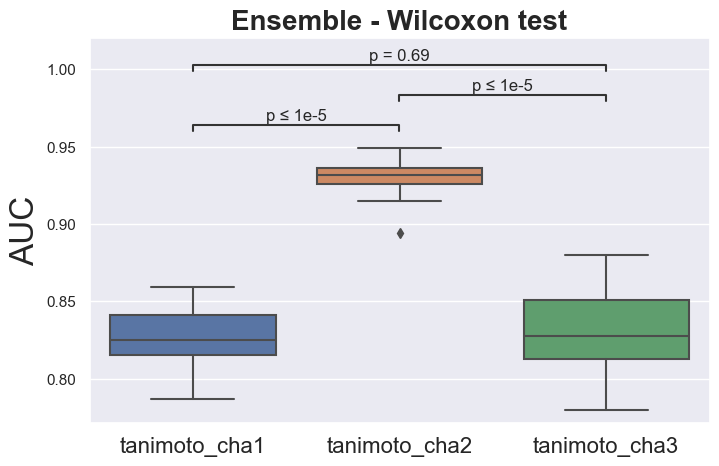

In [120]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC_cha.reset_index(), id_vars=['index'], value_vars=AUC_cha.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC_cha['tanimoto_cha1'].astype('float'), AUC_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC_cha['tanimoto_cha2'].astype('float'), AUC_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC_cha['tanimoto_cha1'].astype('float'), AUC_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('tanimoto_cha1', 'tanimoto_cha2'),
         ('tanimoto_cha2','tanimoto_cha3'),
         ('tanimoto_cha1','tanimoto_cha3'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (8,5))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = AUC_cha.columns, fontsize = 16)
ax.set_title("Ensemble - Wilcoxon test",fontsize = 20, weight ='semibold')
plt.savefig("./Image/AUC-Ensemble.png", dpi = 600)

tanimoto_cha1 vs. tanimoto_cha2: Custom statistical test, P_val:3.725e-09
tanimoto_cha2 vs. tanimoto_cha3: Custom statistical test, P_val:2.274e-06
tanimoto_cha1 vs. tanimoto_cha3: Custom statistical test, P_val:1.863e-09


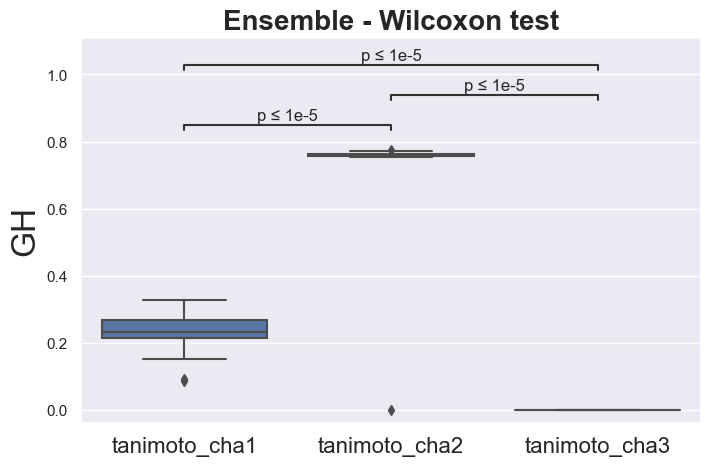

In [121]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH_cha.reset_index(), id_vars=['index'], value_vars=GH_cha.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH_cha['tanimoto_cha1'].astype('float'), GH_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                wilcoxon(GH_cha['tanimoto_cha2'].astype('float'), GH_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                wilcoxon(GH_cha['tanimoto_cha1'].astype('float'), GH_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('tanimoto_cha1', 'tanimoto_cha2'),
         ('tanimoto_cha2','tanimoto_cha3'),
         ('tanimoto_cha1','tanimoto_cha3'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (8,5))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = GH_cha.columns, fontsize = 16)
ax.set_title("Ensemble - Wilcoxon test",fontsize = 20, weight ='semibold')
plt.savefig("./Image/GH-Ensemble.png", dpi = 600)

# 5. Stacking

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score
def get_external(y_true, y_pred, score):
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, score)
    gh = GH_score(y_true, y_pred)
    return f1, auc, gh

cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)
col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [27]:
pwd

'C:\\Users\\DELL\\OneDrive - UMP\\similarity\\Similarity-final'

In [29]:
model_stacking = []
list_auc_stacking = []
list_f1_stacking = []
list_GH_stacking = []

path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in query:
    print(query[i].GetProp("_Name"))
    clf = XGBClassifier(random_state=42)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]

    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Active'], axis = 1), 
                                                    data.Active, test_size=0.2, random_state=42, stratify = data.Active)
    
    #Internal
    auc= cross_val_score(clf, X_train, y_train, cv=cv, scoring ='roc_auc')
    print(f'AUC = {round(np.mean(auc),3)}±{round(np.std(auc),3)}')
    list_auc_stacking.append(auc)

    f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='f1')
    print(f'F1 = {round(np.mean(f1),3)}±{round(np.std(f1),3)}')
    list_f1_stacking.append(f1)
    
    GH = cross_val_score(clf, X_train, y_train, cv=cv, scoring =GH_scoring)
    print(f'GH = {round(np.mean(GH),3)}±{round(np.std(GH),3)}')
    list_GH_stacking.append(GH)
    
    model_stacking.append(i.GetProp('_Name'))
    
    #External
    clf =  XGBClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    print(classification_report(y_test, clf.predict(X_test),))
    
    ext_f1, ext_auc, ext_gh= get_external(y_test, clf.predict(X_test), clf.predict_proba(X_test)[:, 1])
    print('F1 =', ext_f1)
    print('AUC =', ext_auc)
    print('GH =', ext_gh)


In [30]:
AUC_stacking = pd.DataFrame(list_auc_stacking, index =  model_stacking).T
F1_stacking = pd.DataFrame(list_f1_stacking, index =  model_stacking).T
GH_stacking = pd.DataFrame(list_GH_stacking, index =  model_stacking).T

CMF-019 vs. AMG 986: Custom statistical test, P_val:9.301e-03
AMG 986 vs. BMS-986224: Custom statistical test, P_val:4.971e-02
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.639e-07


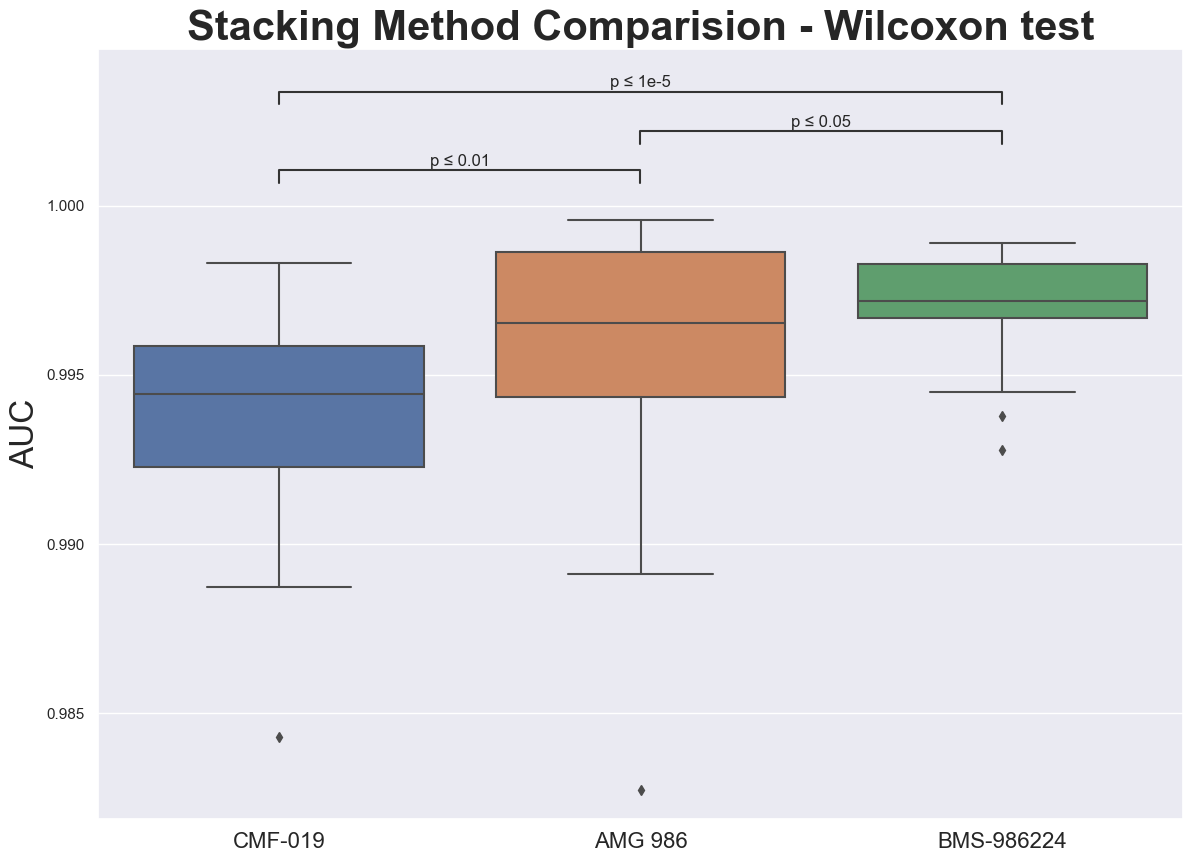

In [47]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC['CMF-019'].astype('float'), AUC['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['AMG 986'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['CMF-019'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/AUC- Stacking Fingerprint.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.304e-07
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.863e-09


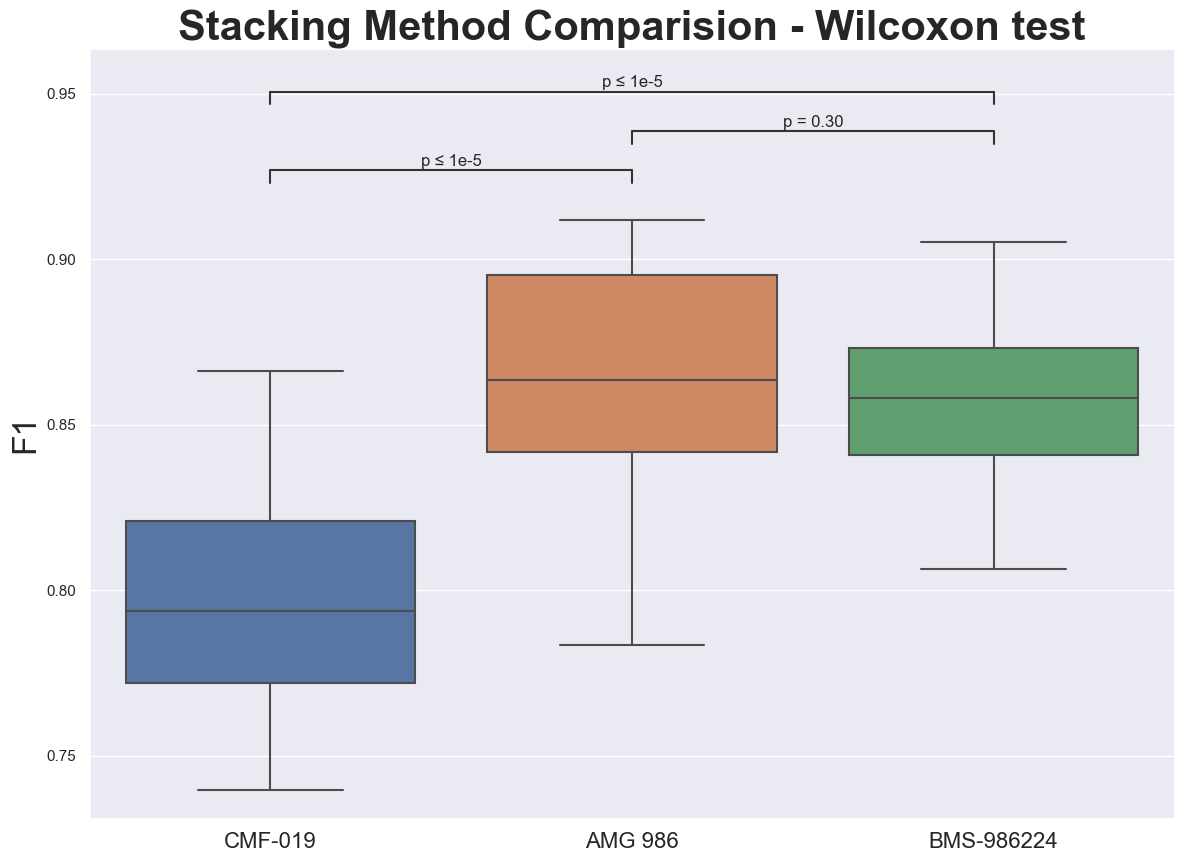

In [48]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1.reset_index(), id_vars=['index'], value_vars=F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1['CMF-019'].astype('float'), F1['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['AMG 986'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['CMF-019'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='F1', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/F1- Stacking Fingerprint.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.192e-06
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.061e-05


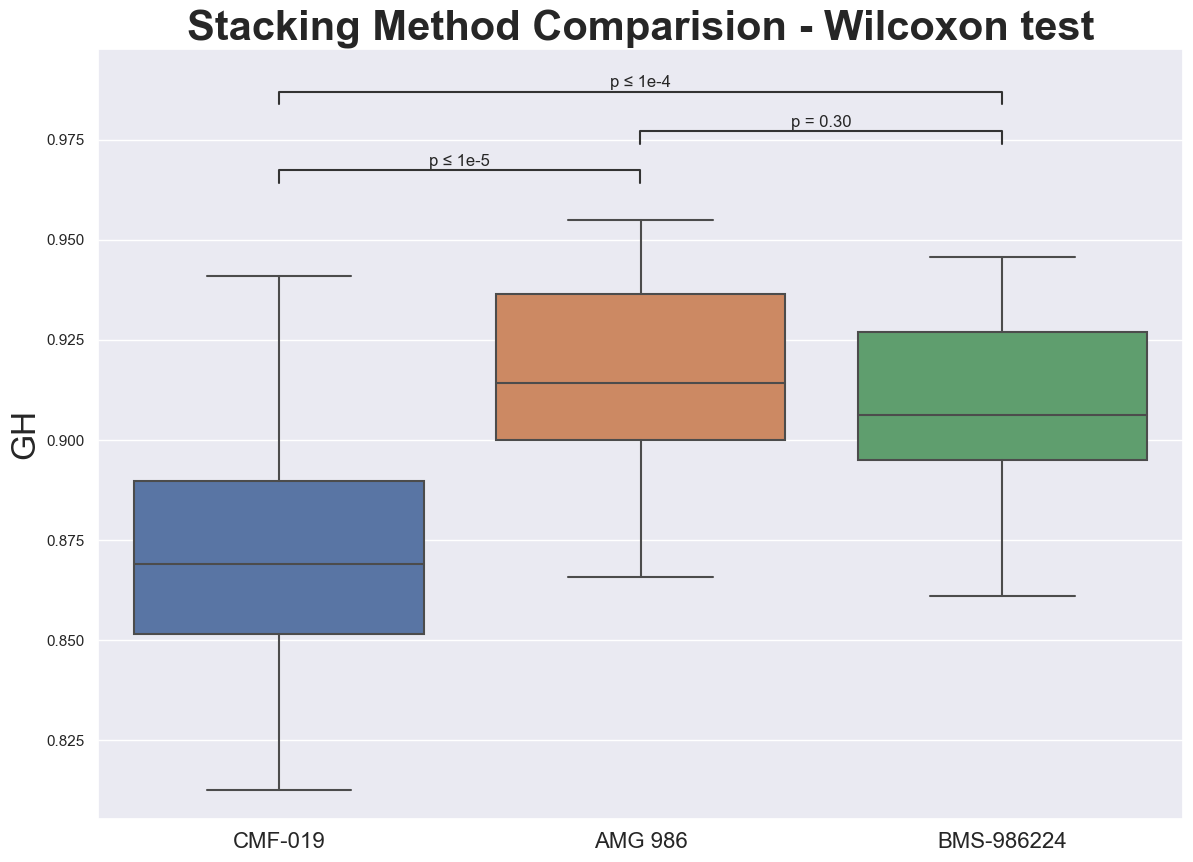

In [49]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH.reset_index(), id_vars=['index'], value_vars=GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH['CMF-019'].astype('float'), GH['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['AMG 986'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['CMF-019'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/GH- Stacking Fingerprint.png", dpi = 600)

# 6. Optimization

- FP Selection for AMG 986

In [31]:
path

'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'

In [32]:
AMG = pd.read_csv(f"{path}/AMG 986.csv")
AMG.head()

,Unnamed: 0,ID,Active,CanonSmiles,Molecule,ROMol,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,...,dice_ecfp2,dice_ecfp4,dice_ecfp6,dice_fcfp2,dice_fcfp4,dice_fcfp6,dice_rdk5,dice_rdk6,dice_rdk7,dice_map4
0,0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x7fb7686e13c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb7640617b0>,0.406015,0.423913,0.190476,0.106195,...,0.320000,0.192000,0.140351,0.058824,0.017391,0.012270,0.331361,0.443256,0.409178,0.603200
1,1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad270>,<rdkit.Chem.rdchem.Mol object at 0x7fb764061660>,0.379048,0.388889,0.177419,0.098214,...,0.301370,0.178862,0.142857,0.060606,0.017699,0.025000,0.330330,0.429262,0.403383,0.580977
2,2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad2e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb764061890>,0.404059,0.408602,0.161290,0.088496,...,0.277778,0.162602,0.116959,0.030769,0.035398,0.024540,0.334317,0.441956,0.416772,0.597738
3,3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad350>,<rdkit.Chem.rdchem.Mol object at 0x7fb76408b0b0>,0.407895,0.417582,0.187500,0.104348,...,0.315789,0.188976,0.137931,0.057971,0.017094,0.012048,0.333996,0.440455,0.403469,0.610675
4,4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad3c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb76408b350>,0.391144,0.428571,0.200000,0.110092,...,0.333333,0.198347,0.146341,0.030769,0.018018,0.012821,0.342801,0.440095,0.402961,0.598832


In [ ]:
# columns = tani_col + ['Active']
data_opt_AMG= AMG[columns]


#split data
from sklearn.model_selection import train_test_split
X_train_opt_AMG, X_test_opt_AMG, y_train_opt_AMG, y_test_opt_AMG = train_test_split(data_opt_AMG.drop(['Active'], axis = 1), 
                                                    data_opt_AMG.Active, test_size=0.2, random_state=42, 
                                                    stratify = data_opt_AMG.Active)
    
X_train_opt_AMG

## Random Forest

In [34]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model_AMG_RF = RandomForestClassifier(random_state=42)
model_AMG_RF.fit(X_train_opt_AMG, y_train_opt_AMG)
select_AMG_RF =  SelectFromModel(model_AMG_RF, prefit=True)

X_train_new_AMG_RF = select_AMG_RF.transform(X_train_opt_AMG.values)
X_test_new_AMG_RF = select_AMG_RF.transform(X_test_opt_AMG.values)
model_opt_AMG_RF = XGBClassifier(random_state=42)
model_opt_AMG_RF.fit(X_train_new_AMG_RF, y_train_opt_AMG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [35]:
#cross-validation

from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)


auc_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring ='roc_auc')
#list_auc_opt.append(auc_opt)
print(f'AUC = {round(np.mean(auc_opt_AMG_RF ),3)}±{round(np.std(auc_opt_AMG_RF ),3)}')

f1_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring ='f1')
#list_f1_opt.append(f1_opt)
print(f'F1 = {round(np.mean(f1_opt_AMG_RF ),3)}±{round(np.std(f1_opt_AMG_RF ),3)}')    

#recall_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring ='recall')
#list_recall_opt.append(recall_opt)
#print(f'Recall = {round(np.mean(recall_opt_AMG_RF ),3)}±{round(np.std(recall_opt_AMG_RF ),3)}')

GH_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring =GH_scoring)
#list_GH_opt.append(GH_opt)    
print(f'GH = {round(np.mean(GH_opt_AMG_RF ),3)}±{round(np.std(GH_opt_AMG_RF ),3)}')

AUC = 0.992±0.005
F1 = 0.823±0.036
GH = 0.874±0.029


In [23]:
#test- validation
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score
def get_external(y_true, y_pred, score):
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, score)
    gh = GH_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return f1, auc, gh ,recall

print(classification_report(y_test_opt_AMG, model_opt_AMG_RF .predict(X_test_new_AMG_RF ),))

ext_f1_opt_AMG_RF , ext_auc_opt_AMG_RF , ext_gh_opt_AMG_RF , ext_recall_opt_AMG_RF  = get_external(y_test_opt_AMG, model_opt_AMG_RF .predict(X_test_new_AMG_RF ),
                                                                        model_opt_AMG_RF .predict_proba(X_test_new_AMG_RF )[:, 1])
print('F1 =', ext_f1_opt_AMG_RF)
print('AUC =', ext_auc_opt_AMG_RF)
print('GH =', ext_gh_opt_AMG_RF)
print("Recall =", ext_recall_opt_AMG_RF)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8863
           1       0.94      0.74      0.83       180

    accuracy                           0.99      9043
   macro avg       0.97      0.87      0.91      9043
weighted avg       0.99      0.99      0.99      9043

F1 = 0.8297213622291022
AUC = 0.9940896611380646
GH = 0.8880056652763412
Recall = 0.7444444444444445


In [24]:
feature_name_AMG_RF  = select_AMG_RF.get_feature_names_out(X_train_opt_AMG.columns)
feature_name_AMG_RF

array(['tanimoto_avalon', 'tanimoto_maccs', 'tanimoto_ecfp6',
       'tanimoto_rdk5', 'tanimoto_rdk6', 'tanimoto_rdk7'], dtype=object)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(14,6))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type +"- " 'FEATURE IMPORTANCE', fontsize = 30, weight ='semibold' )
    plt.xlabel('FEATURE IMPORTANCE', fontsize = 24, weight ='semibold')
    plt.savefig("./Image/ {model_type} - FEATURE IMPORTANCE.png", dpi = 600)
    

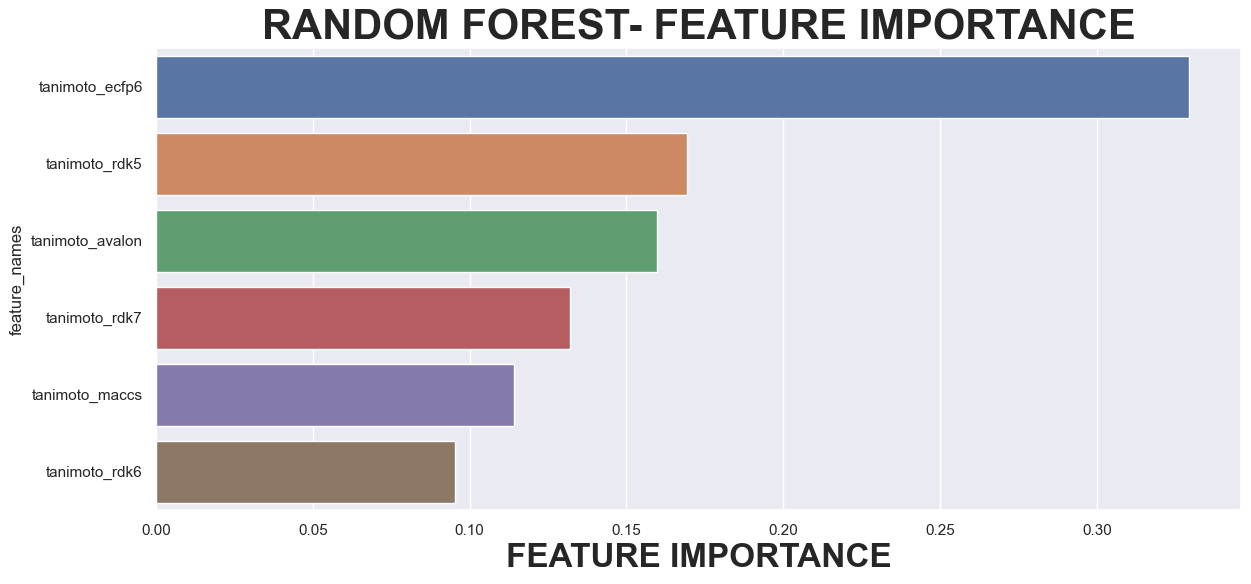

In [135]:
plot_feature_importance(model_opt_AMG_RF.feature_importances_, feature_name_AMG_RF ,'RANDOM FOREST')

## XGB

In [152]:
#XGB
from sklearn.feature_selection import SelectFromModel
model_AMG_XGB = XGBClassifier(random_state=42)
model_AMG_XGB.fit(X_train_opt_AMG, y_train_opt_AMG)
select_AMG_XGB =  SelectFromModel(model_AMG_XGB, prefit=True)

X_train_new_AMG_XGB = select_AMG_XGB.transform(X_train_opt_AMG.values)
X_test_new_AMG_XGB = select_AMG_XGB.transform(X_test_opt_AMG.values)
model_opt_AMG_XGB = XGBClassifier(random_state=42)
model_opt_AMG_XGB.fit(X_train_new_AMG_XGB , y_train_opt_AMG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [153]:
#cross-validation

from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)


auc_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='roc_auc')
#list_auc_opt.append(auc_opt)
print(f'AUC = {round(np.mean(auc_opt_AMG_XGB ),3)}±{round(np.std(auc_opt_AMG_XGB ),3)}')

f1_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='f1')
#list_f1_opt.append(f1_opt)
print(f'F1 = {round(np.mean(f1_opt_AMG_XGB ),3)}±{round(np.std(f1_opt_AMG_XGB ),3)}')    

recall_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='recall')
#list_recall_opt.append(recall_opt)
print(f'Recall = {round(np.mean(recall_opt_AMG_XGB ),3)}±{round(np.std(recall_opt_AMG_XGB ),3)}')

GH_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring =GH_scoring)
#list_GH_opt.append(GH_opt)    
print(f'GH = {round(np.mean(GH_opt_AMG_XGB),3)}±{round(np.std(GH_opt_AMG_XGB),3)}')

AUC = 0.983±0.006
F1 = 0.663±0.045
Recall = 0.562±0.061
GH = 0.749±0.039


In [154]:
#test- validation
print(classification_report(y_test_opt_AMG, model_opt_AMG_XGB .predict(X_test_new_AMG_XGB ),))

ext_f1_opt_AMG_XGB , ext_auc_opt_AMG_XGB , ext_gh_opt_AMG_XGB , ext_recall_opt_AMG_XGB  = get_external(y_test_opt_AMG, model_opt_AMG_XGB .predict(X_test_new_AMG_XGB ),
                                                                        model_opt_AMG_XGB .predict_proba(X_test_new_AMG_XGB )[:, 1])
print('F1 =', ext_f1_opt_AMG_XGB)
print('AUC =', ext_auc_opt_AMG_XGB)
print('GH =', ext_gh_opt_AMG_XGB)
print("Recall =", ext_recall_opt_AMG_XGB)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8863
           1       0.84      0.59      0.70       180

    accuracy                           0.99      9043
   macro avg       0.92      0.80      0.85      9043
weighted avg       0.99      0.99      0.99      9043

F1 = 0.6970684039087948
AUC = 0.9831383905625134
GH = 0.7787396182622045
Recall = 0.5944444444444444


In [155]:
feature_name_AMG_XGB  = select_AMG_XGB.get_feature_names_out(X_train_opt_AMG.columns)
feature_name_AMG_XGB

array(['tanimoto_avalon', 'tanimoto_ecfp6', 'tanimoto_rdk5',
       'tanimoto_rdk7'], dtype=object)

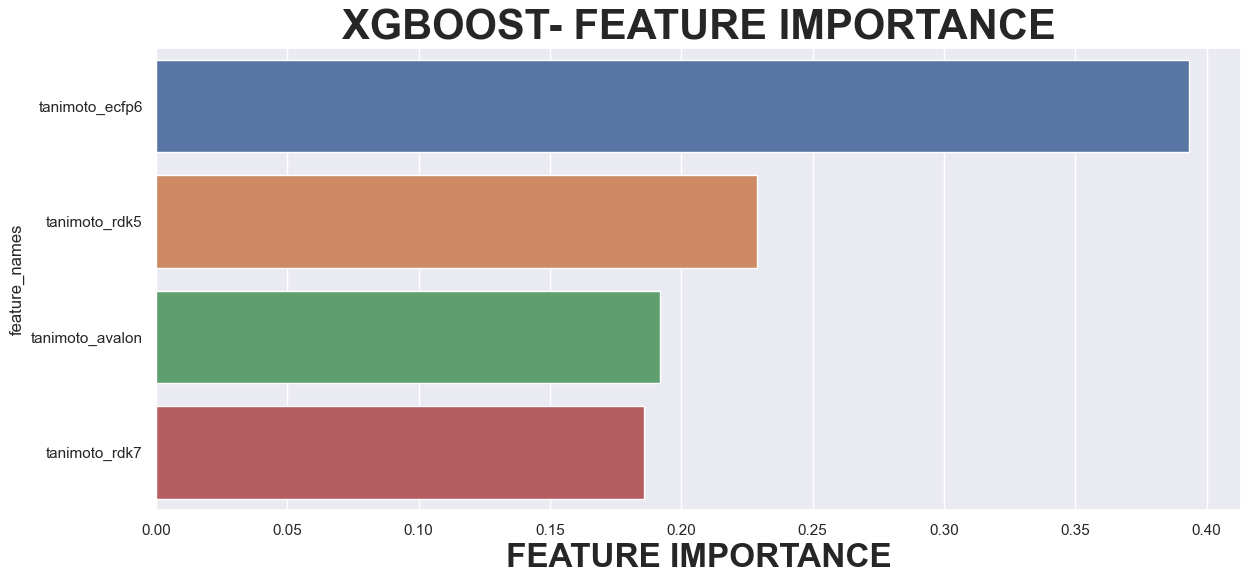

In [156]:
plot_feature_importance(model_opt_AMG_XGB.feature_importances_, feature_name_AMG_XGB ,'XGBOOST')

# 7. Internal comparison

- AMG_986_RDK7
- Ensemble
- Stacking - AMG 986
- Optimization

In [45]:
#index = ['AMG_986_rdk5', 'AMG_986_stacking','AMG_986_optimal']

#AMG-986-RDK5
#AMG_986_AUC = AUC.iloc[30:60,:].reset_index(drop=True)
#AMG_986_F1 = F1.iloc[30:60,:].reset_index(drop=True)
#AMG_986_GH = GH.iloc[30:60,:].reset_index(drop=True)

#Ensemble
#AUC_cha = pd.DataFrame(list_AUC_CHA, columns = model_cha)
#F1_cha = pd.DataFrame(list_F1_CHA, columns = model_cha)
#GH_cha = pd.DataFrame(list_GH_CHA, columns = model_cha)

#stacking
#AUC_stacking = pd.DataFrame(list_auc_stacking, index =  model).T
#F1_stacking = pd.DataFrame(list_f1_stacking, index =  model).T
#GH_stacking = pd.DataFrame(list_GH_stacking, index =  model).T

#opt
#auc_opt_AMG_RF
#GH_opt_AMG_RF
#f1_opt_AMG_RF

In [132]:
#AUC
index = ['AMG_986_rdk5','AMG_986_stacking','AMG_986_optimal','Ensemble-CHA2']
AUC_internal = []
AUC_internal.append(AMG_986_AUC['tanimoto_rdk5'])
AUC_internal.append(AUC_stacking['AMG 986'])
AUC_internal.append(auc_opt_AMG_RF)
AUC_internal.append(AUC_cha['tanimoto_cha2'])

In [133]:
#F1
index = ['AMG_986_rdk5','AMG_986_stacking','AMG_986_optimal','Ensemble-CHA2']
F1_internal = []
F1_internal.append(AMG_986_F1['tanimoto_rdk5'])
F1_internal.append(F1_stacking['AMG 986'])
F1_internal.append(f1_opt_AMG_RF)
F1_internal.append(F1_cha['tanimoto_cha2'])

In [134]:
#GH
index = ['AMG_986_rdk5','AMG_986_stacking','AMG_986_optimal','Ensemble-CHA2']
GH_internal = []
GH_internal.append(AMG_986_GH['tanimoto_rdk5'])
GH_internal.append(GH_stacking['AMG 986'])
GH_internal.append(GH_opt_AMG_RF)
GH_internal.append(GH_cha['tanimoto_cha2'])

In [135]:
df_AUC_internal = pd.DataFrame(AUC_internal, index = index).T
df_AUC_internal 

,AMG_986_rdk5,AMG_986_stacking,AMG_986_optimal,Ensemble-CHA2
0,0.905,0.998962,0.996274,0.935
1,0.894,0.996979,0.992019,0.928
2,0.918,0.995671,0.996157,0.949
3,0.883,0.990233,0.988313,0.894
4,0.920,0.990836,0.991949,0.942
5,0.920,0.994723,0.988215,0.936
6,0.925,0.998472,0.995945,0.930
7,0.913,0.999193,0.997802,0.926
8,0.934,0.989108,0.976716,0.928
9,0.932,0.998208,0.995614,0.938


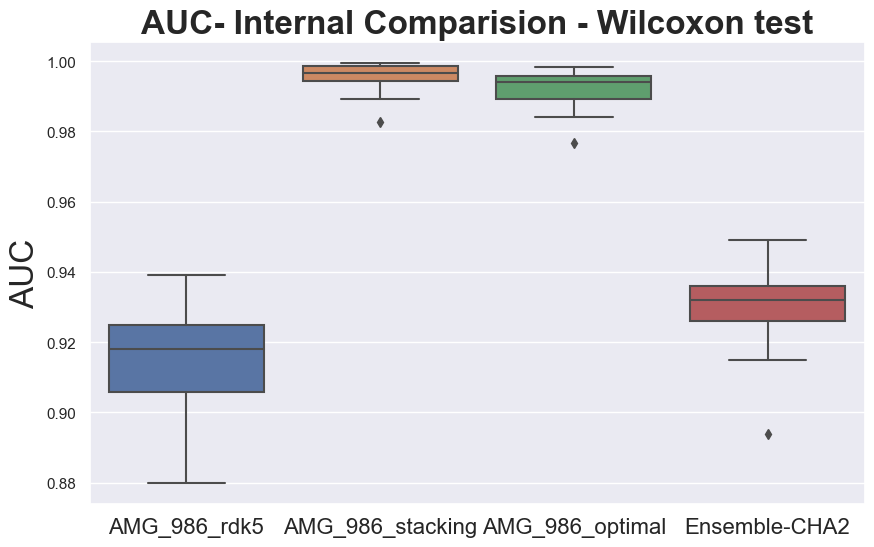

In [136]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_AUC_internal.reset_index(), id_vars=['index'], value_vars=df_AUC_internal.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)


plt.figure(figsize = (10,6))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_AUC_internal.columns, fontsize = 16)
ax.set_title("AUC- Internal Comparision - Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/AUC Internal Comparision.png", dpi = 600)

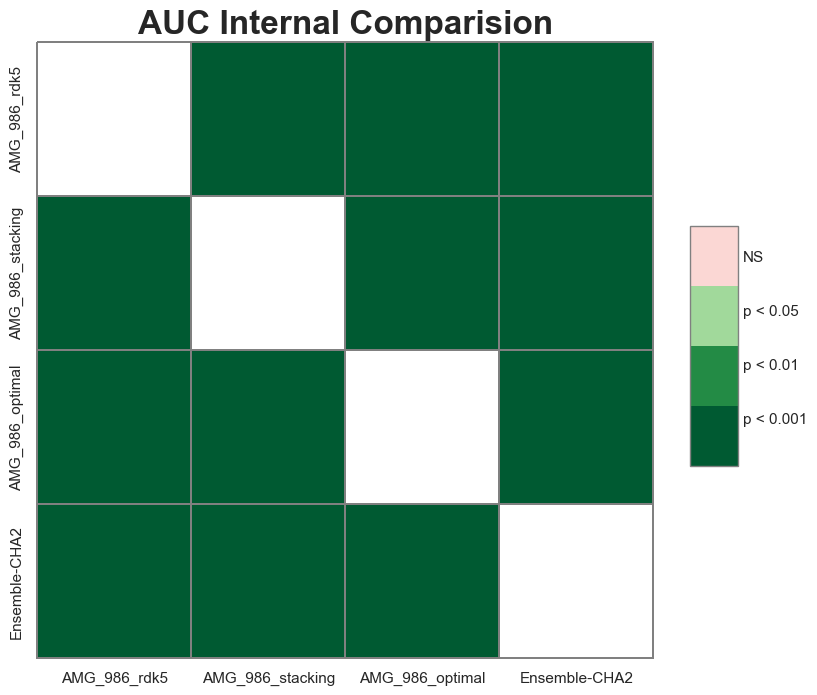

In [137]:
import scikit_posthocs as sp
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (12,8))
plt.title("AUC Internal Comparision", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/AUC Internal Comparision- posthoc.png", dpi = 600)

In [138]:
df_F1_internal = pd.DataFrame(F1_internal, index = index).T

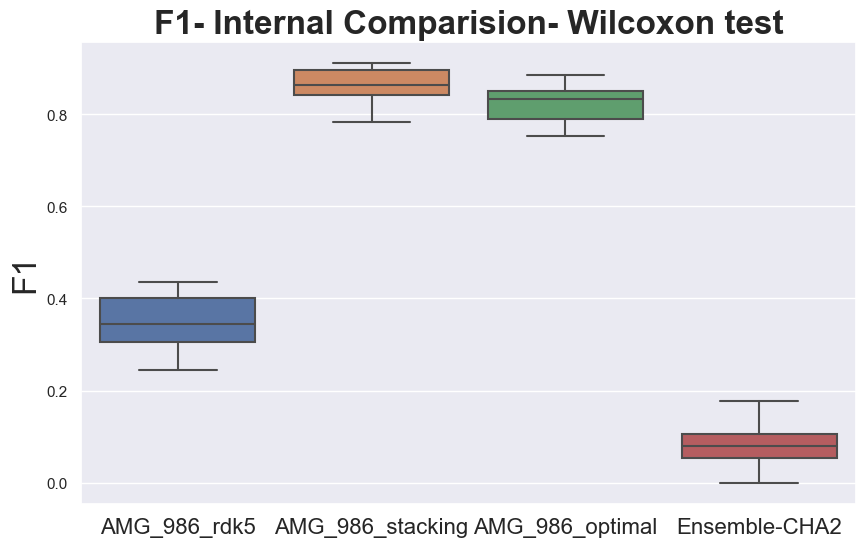

In [139]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_F1_internal.reset_index(), id_vars=['index'], value_vars=df_F1_internal.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)


plt.figure(figsize = (10,6))

ax = sns.boxplot(x='Model', y='F1', data=df_melt)


ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_F1_internal.columns, fontsize = 16)
ax.set_title("F1- Internal Comparision- Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/F1 Internal Comparision.png", dpi = 600)

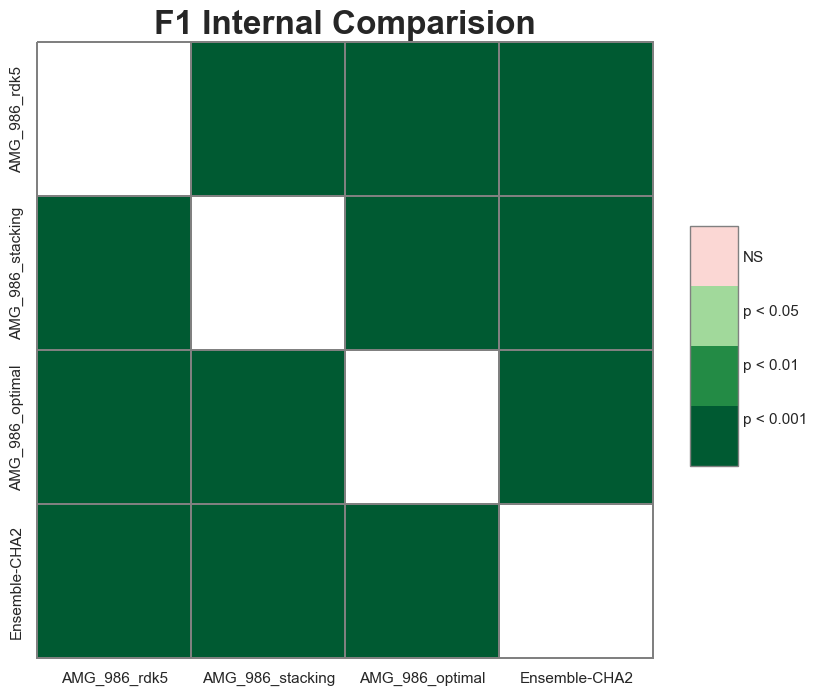

In [140]:
import scikit_posthocs as sp
pc =sp.posthoc_wilcoxon(df_melt, val_col='F1', group_col='Model', p_adjust='holm')
plt.figure(figsize = (12,8))
plt.title("F1 Internal Comparision", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/F1 Internal Comparision- posthoc.png", dpi = 600)

In [141]:
df_GH_internal = pd.DataFrame(GH_internal, index = index).T

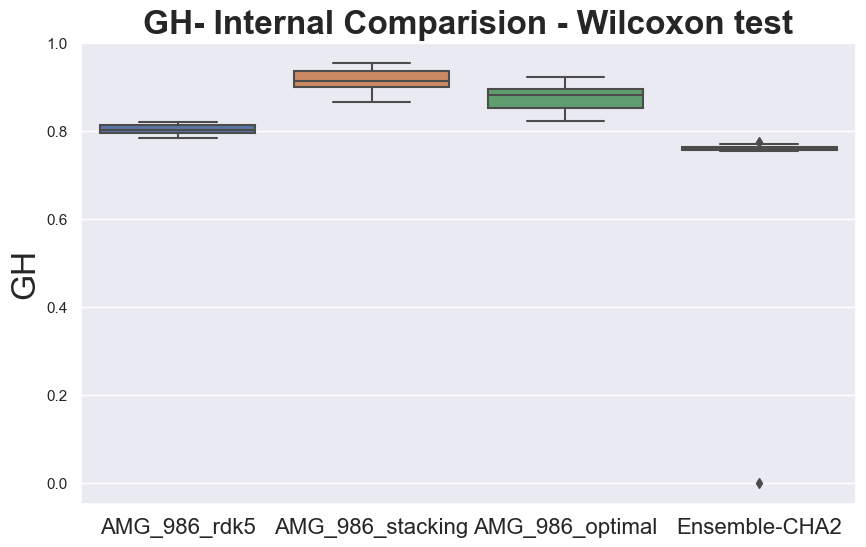

In [142]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_GH_internal.reset_index(), id_vars=['index'], value_vars=df_GH_internal.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

plt.figure(figsize = (10,6))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)

ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_GH_internal.columns, fontsize = 16)
ax.set_title("GH- Internal Comparision - Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/GH Internal Comparision.png", dpi = 600)

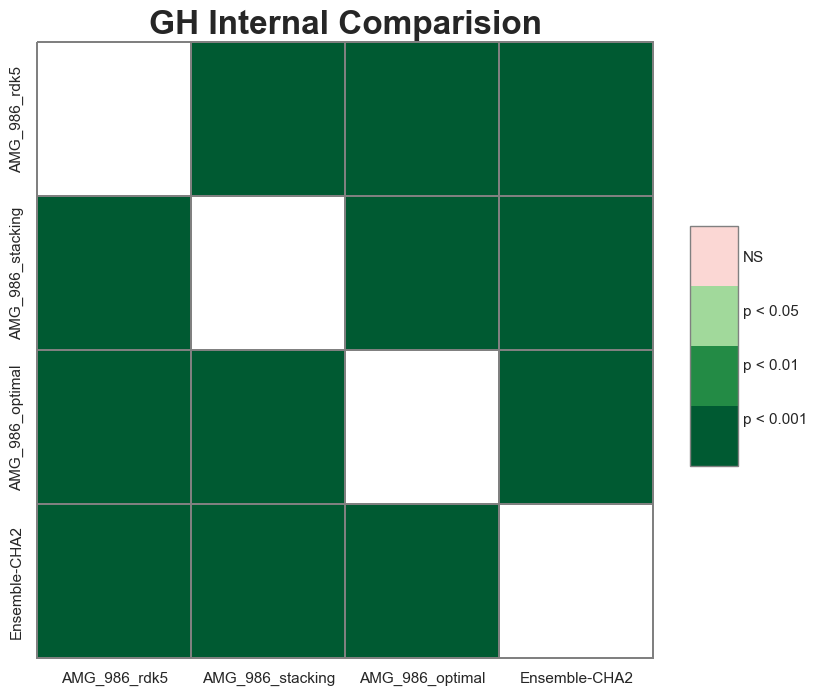

In [143]:
import scikit_posthocs as sp
pc =sp.posthoc_wilcoxon(df_melt, val_col='GH', group_col='Model', p_adjust='holm')
plt.figure(figsize = (12,8))
plt.title("GH Internal Comparision", fontsize = 24, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/GH Internal Comparision- posthoc.png", dpi = 600)

# 8. External

In [122]:
path

'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'